# PART- 3 (Handling With Outliers)

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

%matplotlib inline

#  plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', 500)


pd.options.display.max_rows = 120
pd.options.display.max_columns = 120

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [354]:
df = pd.read_csv("final_scout_not_dummy.csv")
df0 = df.copy()

In [355]:
df.head(3).T

,0,1,2
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,ES,ES,ES
price,16950.00,80900.00,69900.00
body_type,Compact,Compact,Compact
type,Used,Pre-registered,Used
doors,5.00,4.00,5.00
warranty,24.00,24.00,12.00
mileage,120200.00,5000.00,18900.00
gearbox,Manual,Automatic,Automatic
fuel_type,diesel,electric,benzine


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24552 entries, 0 to 24551
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         24552 non-null  object 
 1   location                     24552 non-null  object 
 2   price                        24552 non-null  float64
 3   body_type                    24552 non-null  object 
 4   type                         24552 non-null  object 
 5   doors                        24552 non-null  float64
 6   warranty                     24552 non-null  float64
 7   mileage                      24552 non-null  float64
 8   gearbox                      24552 non-null  object 
 9   fuel_type                    24552 non-null  object 
 10  colour                       24552 non-null  object 
 11  seller                       24552 non-null  object 
 12  seats                        24552 non-null  float64
 13  power           

In [357]:
df.shape

(24552, 33)

In [358]:
null_sum = pd.DataFrame(df.isna().sum(), columns = ["null_sum"])
# null_sum
null_perc = round(pd.DataFrame(df.isna().sum()/df.shape[0]*100 , columns = ["null_perc"]),3)
# null_perc 

null_summary = pd.concat([null_sum,null_perc], axis= 1).reset_index().rename(columns = {"index":"col_names"})
null_summary

,col_names,null_sum,null_perc
0,make,0,0.00
1,location,0,0.00
2,price,0,0.00
3,body_type,0,0.00
4,type,0,0.00
5,doors,0,0.00
6,warranty,0,0.00
7,mileage,0,0.00
8,gearbox,0,0.00
9,fuel_type,0,0.00


In [359]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Functions

In [360]:
def fill_bymode_single(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])

In [361]:
def fill_bymode_double(df, group_col1, group_col2, col_name):
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond1 = df[group_col1]==group1
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            mode1 = list(df[cond1][col_name].mode())
            mode2 = list(df[cond2][col_name].mode())
            if mode2 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
            elif mode1 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
            else:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

In [362]:
def fill_bymode_triple(df, group_col1, group_col2, group_col3, col_name):
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            for group3 in list(df[group_col3].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                cond3 = (df[group_col1]==group1) & (df[group_col2]==group2) & (df[group_col3]==group3)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                mode3 = list(df[cond3][col_name].mode())
                if mode3 != []:
                    df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[cond3][col_name].mode()[0])
                elif mode2 != []:
                    df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[col_name].mode()[0])

## check each column 1-by-1

### mileage

In [363]:
df.mileage.describe()

count     24552.00
mean      70947.91
std       67843.67
min           0.00
25%       19146.50
50%       54630.00
75%      104349.00
max     1440000.00
Name: mileage, dtype: float64

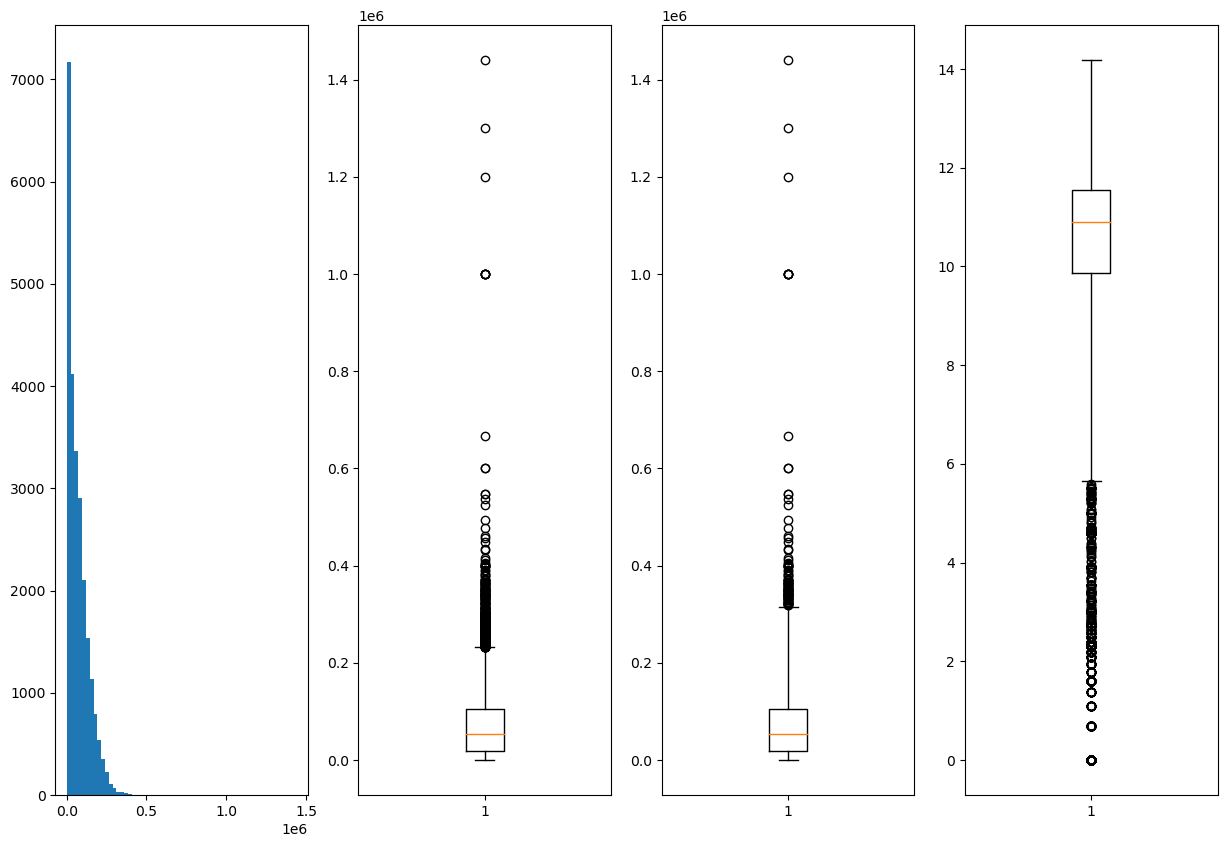

In [364]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.mileage, bins = 60)

plt.subplot(142)
plt.boxplot(df.mileage)

plt.subplot(143)
plt.boxplot(df.mileage, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis = 2.5)
plt.show()

In [365]:
# whis : float, sequence, or string (default = 1.5)
# As a float, determines the reach of the whiskers to the beyond the first and third quartiles. 
# In other words, where IQR is the interquartile range (Q3-Q1), 
# the upper whisker will extend to last datum less than Q3 + whis*IQR). 
# Similarly, the lower whisker will extend to the first datum greater than Q1 - whis*IQR. 

<Axes: xlabel='mileage'>

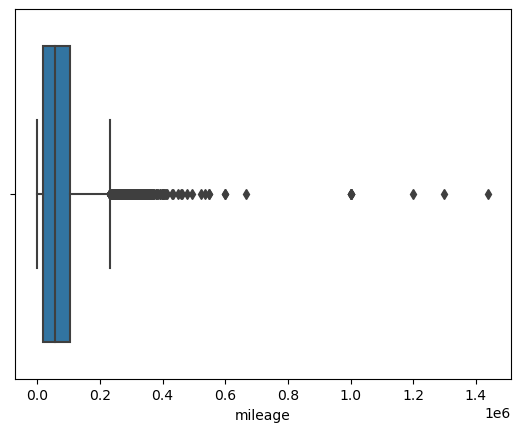

In [366]:
sns.boxplot(df, x = df.mileage)

In [367]:
IQR = np.percentile(df.mileage, 75) - np.percentile(df.mileage, 25)
upper_w = np.percentile(df.mileage, 75) + 1.5*IQR
upper_w

232152.75

In [368]:
lower_w = np.percentile(df.mileage, 25) - 1.5*IQR
lower_w

-108657.25

<Axes: xlabel='mileage'>

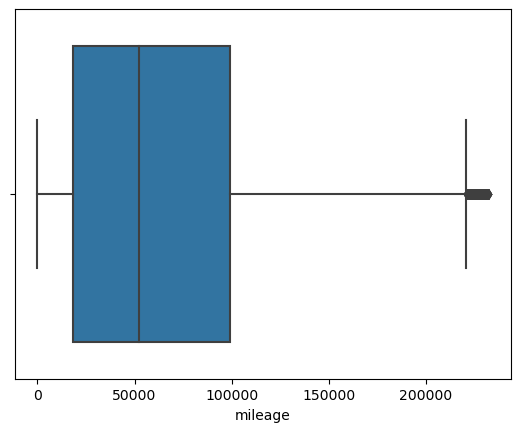

In [369]:
sns.boxplot(df, x = df[df['mileage']<232152.75]['mileage'])

In [370]:
df[df['mileage']>232152.75]['mileage'].shape

(616,)

It seems there are 616 outliers, but lets check their age

In [371]:
df[df['mileage']>232152.75]['age'].describe()

count   616.00
mean     16.69
std       7.80
min       3.00
25%      12.00
50%      15.00
75%      20.00
max      89.00
Name: age, dtype: float64

In [372]:
df[df['mileage']>300000]['age'].describe()

count   135.00
mean     18.09
std      11.10
min       3.00
25%      12.00
50%      15.00
75%      21.00
max      89.00
Name: age, dtype: float64

In [373]:
 df[df['mileage'] > 300000]['age']

270     37.00
1058    17.00
1156    12.00
1194    11.00
1274    15.00
         ... 
24391   15.00
24398   15.00
24400   22.00
24454   18.00
24503   21.00
Name: age, Length: 135, dtype: float64

In [374]:
df[(df['age'] < 10) & (df['mileage'] > 400000)]

,make,location,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,colour,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,fuel_city_cons,fuel_country_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
11370,SEAT,ES,10200.00,Compact,Used,5.00,12.00,1199900.00,Manual,diesel,White,Dealer,5.00,70.00,1598.00,5.00,89.00,Front,4.00,1243.00,0,Euro 6,Black,Cloth,1.00,4.00,3.70,4.40,3.40,Standard,Standard Media,Standard_extras,Safety Standard Package
13428,Skoda,ES,6500.00,Station wagon,Used,5.00,12.00,546888.00,Manual,diesel,Grey,Dealer,5.00,110.00,1968.00,6.00,122.00,Front,4.00,1342.00,0,Euro 5,Black,Cloth,2.00,8.00,4.20,5.10,3.70,Standard,Standard Media,Standard_extras,Safety Standard Package
13446,Skoda,ES,11500.00,Station wagon,Used,5.00,6.00,415000.00,Automatic,diesel,White,Dealer,5.00,110.00,1998.00,7.00,122.00,Front,4.00,1520.00,0,Euro 6,Black,Cloth,1.00,5.00,4.60,5.40,4.20,Standard,Standard Media,Standard_extras,Safety Standard Package
16798,Toyota,ES,6600.00,Sedan,Used,4.00,12.00,523992.00,Manual,diesel,White,Dealer,5.00,91.00,1998.00,6.00,119.00,Front,4.00,1490.00,0,Euro 6,Black,Cloth,1.00,7.00,4.50,5.60,3.90,Standard,Standard Media,Standard_extras,Safety Standard Package
17217,Nissan,ES,14400.00,Compact,Used,5.00,12.00,1440000.00,Manual,benzine,Grey,Dealer,5.00,74.00,999.00,5.00,99.00,Front,3.00,1076.00,1,Euro 6,Black,Cloth,1.00,3.00,4.60,5.60,4.00,Standard,Standard Media,Standard_extras,Safety Standard Package
18266,Nissan,ES,8000.00,Station wagon,Used,5.00,12.00,477000.00,Manual,benzine,Grey,Private seller,5.00,81.00,1598.00,5.00,169.00,Front,4.00,1311.00,0,Euro 6,Blue,Cloth,2.00,8.00,7.30,9.10,6.30,Standard,Premium Media,Standard_extras,Safety Standard Package
20912,Ford,DE,9990.00,Sedan,Used,3.00,12.00,1000001.00,Manual,benzine,White,Dealer,5.00,52.00,1084.00,5.00,114.00,Front,3.00,1108.00,1,Euro 6,Grey,Cloth,1.00,4.00,5.10,6.50,4.30,Standard,Standard Media,Standard_extras,Safety Premium Plus Package
22273,Hyundai,DE,4950.00,Station wagon,Used,4.00,12.00,402000.00,Manual,diesel,Black,Dealer,5.00,100.00,1685.00,6.00,124.00,Front,4.00,1485.00,1,Euro 5,Black,Cloth,2.00,8.00,4.70,5.50,4.30,Standard,Standard Media,Standard_extras,Safety Standard Package


In [375]:
cond1_age = (df['age'] < 10) & (df['mileage'] > 400000)

In [376]:
df.loc[cond1_age, 'mileage'] = np.nan

In [377]:
fill_bymode_triple(df, 'make', 'body_type', 'age', 'mileage')

In [378]:
cond2_age = (df['age'] < 15) & (df['mileage'] > 500000)

In [379]:
df.loc[cond2_age, 'mileage'] = np.nan

In [380]:
fill_bymode_triple(df, 'make', 'body_type', 'age', 'mileage')

In [381]:
df[df['mileage']>500000]['age'].describe()

count    8.00
mean    47.25
std     21.63
min     22.00
25%     32.75
50%     49.00
75%     54.50
max     89.00
Name: age, dtype: float64

In [382]:
df[df['mileage']>500000][['mileage','age']]

,mileage,age
3043,536388.00,44.00
3222,999999.00,54.00
7338,1000000.00,54.00
9568,999999.00,89.00
15912,1300000.00,36.00
16442,547000.00,23.00
19423,999999.00,56.00
24400,600001.00,22.00


In [383]:
cond3_age = df['mileage']>600002

In [384]:
df.loc[cond3_age, 'mileage'] = np.nan

In [385]:
fill_bymode_triple(df, 'make', 'body_type', 'age', 'mileage')

In [386]:
df.mileage.isna().sum()

0

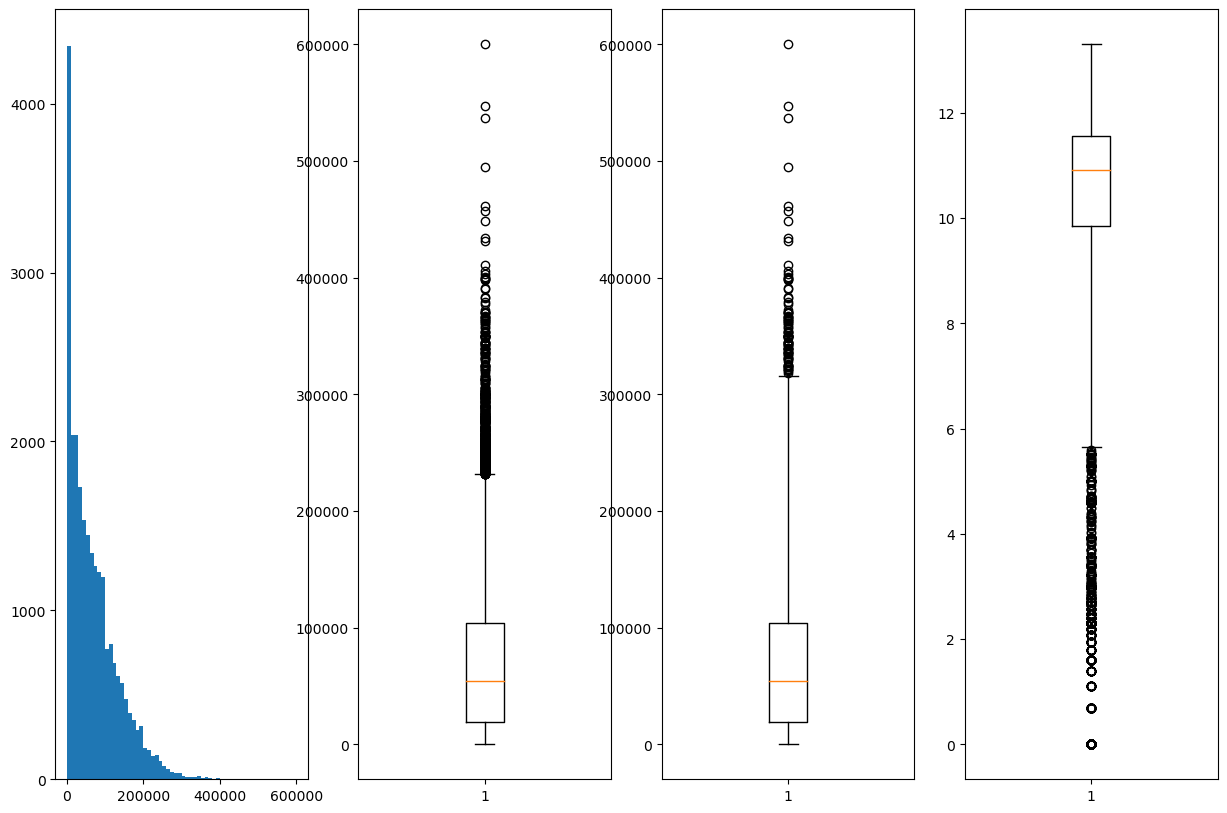

In [387]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.mileage, bins = 60)

plt.subplot(142)
plt.boxplot(df.mileage)

plt.subplot(143)
plt.boxplot(df.mileage, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis = 2.5)
plt.show()

leave the rest as it is 

### fuel_comb_cons	and other fuel consumptions

In [388]:
df.fuel_comb_cons.describe()

count   24552.00
mean        5.79
std         2.95
min         0.00
25%         4.47
50%         5.30
75%         6.80
max        99.90
Name: fuel_comb_cons, dtype: float64

In [389]:
df.fuel_city_cons.describe()

count   24552.00
mean        7.41
std         3.78
min         0.00
25%         5.40
50%         6.50
75%         8.80
max        99.90
Name: fuel_city_cons, dtype: float64

In [390]:
df.	fuel_country_cons.describe()

count   24552.00
mean        4.95
std         1.87
min         0.00
25%         4.00
50%         4.70
75%         5.70
max        98.00
Name: fuel_country_cons, dtype: float64

In [391]:
df[df['fuel_comb_cons']==0]['fuel_comb_cons'].count()

605

In [392]:
df[df['fuel_country_cons']==0]['fuel_country_cons'].count()

548

In [393]:
df[df['fuel_city_cons']==0]['fuel_city_cons'].count()

546

<Axes: xlabel='fuel_comb_cons'>

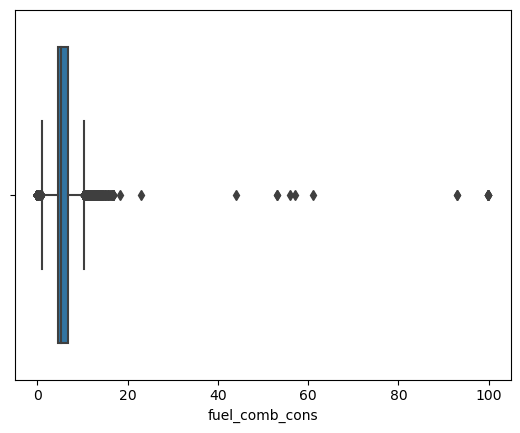

In [394]:
sns.boxplot(df, x = df.fuel_comb_cons)

<Axes: xlabel='fuel_country_cons'>

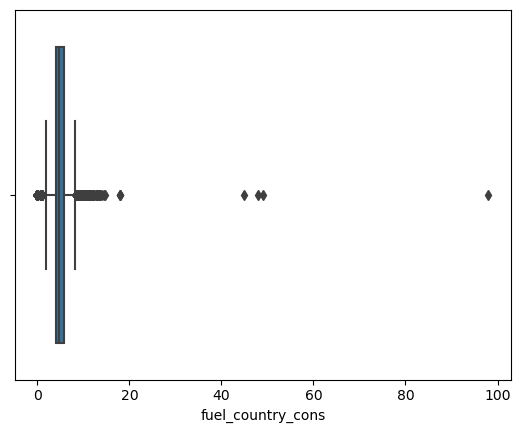

In [395]:
sns.boxplot(df, x = df.fuel_country_cons)

<Axes: xlabel='fuel_city_cons'>

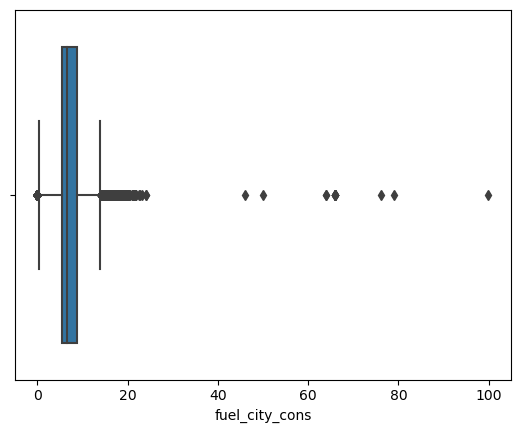

In [396]:
sns.boxplot(df, x = df.fuel_city_cons)

<Axes: >

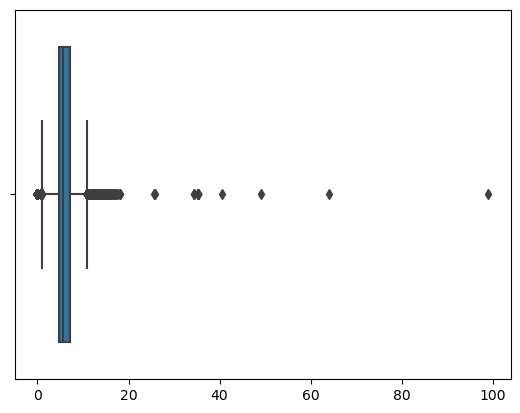

In [397]:
sns.boxplot(df, x = (df['fuel_city_cons'] + df['fuel_country_cons'])/2)

In [398]:
df[(df['fuel_comb_cons']<=3)|(df['fuel_comb_cons']>=12)][['fuel_comb_cons']]

,fuel_comb_cons
8,0.00
16,0.00
22,0.00
31,1.40
34,0.00
...,...
24425,2.00
24433,1.50
24437,1.70
24447,0.00


In [399]:
df['fuel_comb_cons'] = (df['fuel_city_cons'] + df['fuel_country_cons'])/2

In [400]:
df[(df['fuel_comb_cons']<=3)|(df['fuel_comb_cons']>=12)][['fuel_comb_cons']]

,fuel_comb_cons
22,0.00
34,0.00
53,0.00
54,2.45
55,2.45
...,...
24378,13.15
24379,13.15
24384,12.45
24447,0.00


In [401]:
con1_fc = ((df['fuel_comb_cons']<=3)|(df['fuel_comb_cons']>=12))

In [402]:
df.loc[con1_fc,'fuel_comb_cons'] = np.nan

In [403]:
fill_bymode_triple(df, 'make', 'body_type', 'engine_size', 'fuel_comb_cons')

<Axes: xlabel='fuel_comb_cons'>

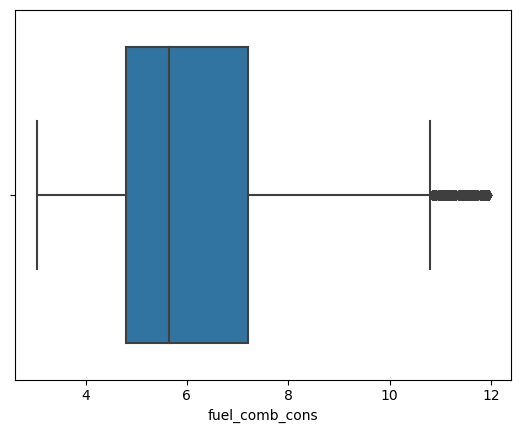

In [404]:
sns.boxplot(df, x = df.fuel_comb_cons)

<Axes: xlabel='fuel_comb_cons', ylabel='price'>

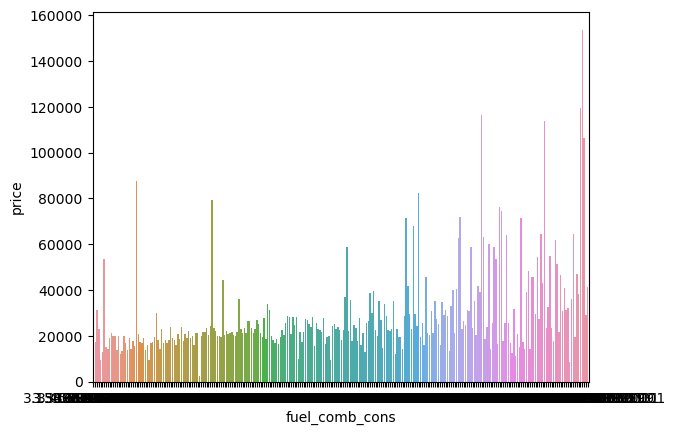

In [405]:
sns.barplot(x=df.groupby("fuel_comb_cons")["price"].mean().index,y=df.groupby("fuel_comb_cons")["price"].mean())

In [406]:
df.fuel_comb_cons.describe()

count   24552.00
mean        6.18
std         1.91
min         3.05
25%         4.80
50%         5.65
75%         7.20
max        11.95
Name: fuel_comb_cons, dtype: float64

In [407]:
df.fuel_comb_cons.isna().sum()

0

In [408]:
df.fuel_comb_cons.sort_values().head(10)

14632   3.05
12178   3.05
23904   3.05
11031   3.10
23308   3.10
9580    3.14
9588    3.14
17013   3.15
17054   3.15
17008   3.15
Name: fuel_comb_cons, dtype: float64

In [409]:
df.fuel_comb_cons.sort_values().tail(10)

17361   11.95
17357   11.95
17355   11.95
17351   11.95
17350   11.95
17343   11.95
17338   11.95
17377   11.95
954     11.95
829     11.95
Name: fuel_comb_cons, dtype: float64

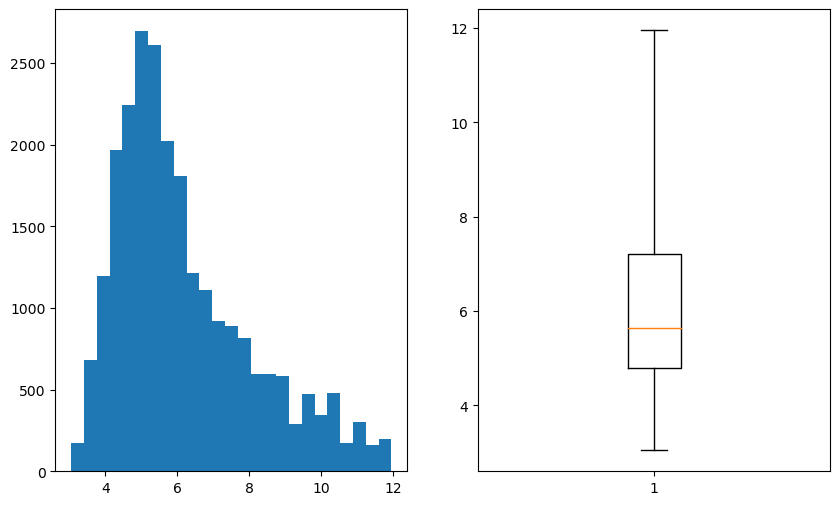

In [410]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.fuel_comb_cons, bins = 25)

plt.subplot(122)
plt.boxplot(df.fuel_comb_cons, whis = 2.5)

plt.show()

In [411]:
df.drop('fuel_city_cons', axis=1, inplace=True)

In [412]:
df.drop('fuel_country_cons', axis=1, inplace=True)

### doors

In [413]:
df.doors.value_counts(dropna=False)

5.00    14732
2.00     4919
4.00     2769
3.00     2125
6.00        5
1.00        2
Name: doors, dtype: int64

In [414]:
df.doors.replace([6,1],np.nan, inplace=True)

In [415]:
df.doors.value_counts(dropna=False)

5.00    14732
2.00     4919
4.00     2769
3.00     2125
NaN         7
Name: doors, dtype: int64

In [416]:
fill_bymode_double(df, 'make', 'body_type', 'doors')

In [417]:
df.doors.value_counts(dropna=False)

5.00    14738
2.00     4920
4.00     2769
3.00     2125
Name: doors, dtype: int64

<Axes: xlabel='make,doors'>

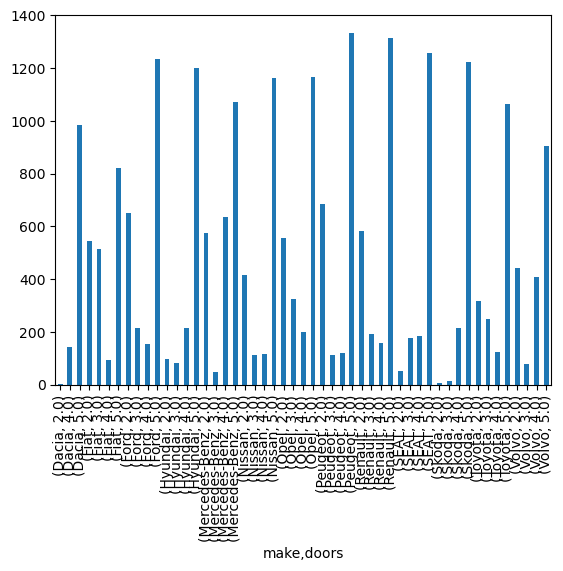

In [418]:
df.groupby(['make','doors']).doors.count().plot.bar()

<Axes: xlabel='doors', ylabel='price'>

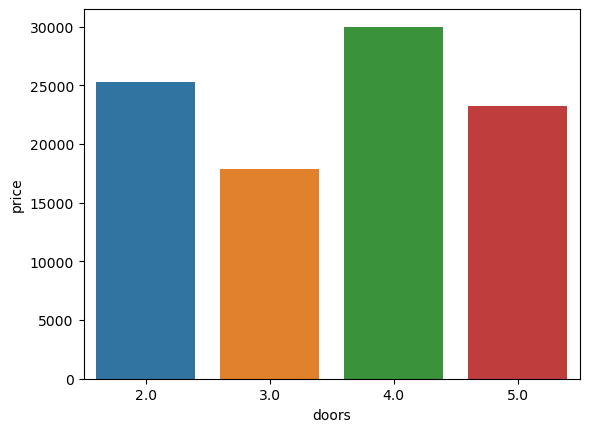

In [419]:
sns.barplot(x=df.groupby("doors")["price"].mean().index,y=df.groupby("doors")["price"].mean())

In [420]:
df.drop('doors',axis=1,inplace=True)

### warranty

In [421]:
df.warranty.value_counts(dropna=False)

12.00     18187
24.00      2157
60.00      1654
6.00        705
3.00        653
36.00       366
0.00        158
13.00       157
48.00        77
84.00        71
72.00        67
50.00        27
8.00         19
1.00         19
2.00         16
18.00        15
30.00        12
34.00        11
33.00        11
15.00        10
16.00        10
14.00        10
20.00         9
21.00         9
19.00         9
23.00         9
32.00         9
35.00         8
28.00         7
22.00         6
17.00         5
42.00         5
9.00          4
47.00         4
31.00         4
26.00         4
52.00         4
58.00         3
25.00         3
27.00         3
10.00         3
11.00         3
7.00          2
80.00         2
29.00         2
51.00         2
90.00         2
45.00         2
53.00         2
57.00         1
44.00         1
122.00        1
55.00         1
49.00         1
37.00         1
99.00         1
39.00         1
110.00        1
46.00         1
117.00        1
43.00         1
65.00         1
142.00  

<Axes: xlabel='warranty', ylabel='price'>

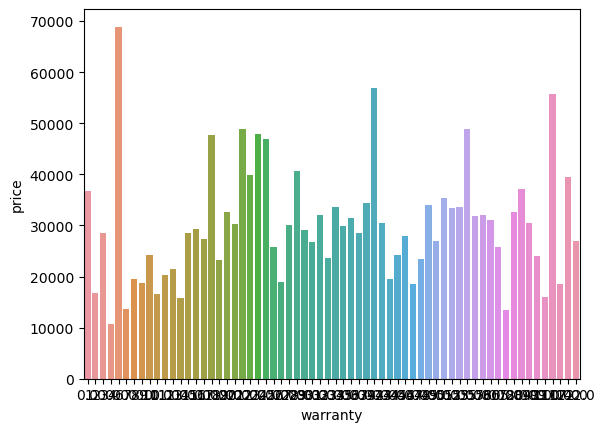

In [422]:
sns.barplot(x=df.groupby("warranty")["price"].mean().index,y=df.groupby("warranty")["price"].mean())

In [423]:
df.drop('warranty',axis=1,inplace=True)

### gearbox

In [424]:
df.gearbox.value_counts(dropna=False)

Manual            14740
Automatic          9749
Semi-automatic       63
Name: gearbox, dtype: int64

<Axes: xlabel='gearbox', ylabel='price'>

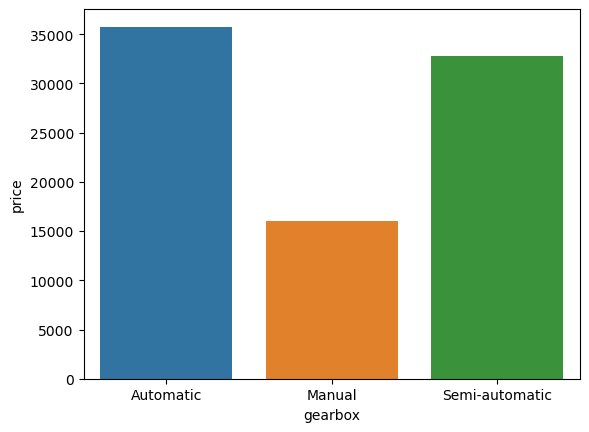

In [425]:
sns.barplot(x=df.groupby("gearbox")["price"].mean().index,y=df.groupby("gearbox")["price"].mean())

### type

In [426]:
df.type.value_counts(dropna=False)

 Used               21464
 Demonstration       1340
 Pre-registered      1226
 Employee's car       522
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='price'>

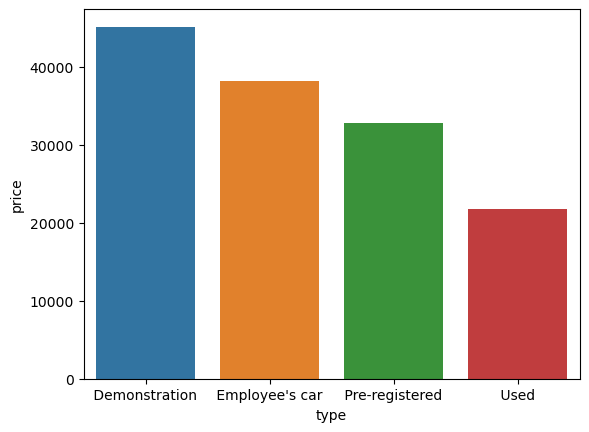

In [427]:
sns.barplot(x=df.groupby("type")["price"].mean().index,y=df.groupby("type")["price"].mean())

### location	

In [428]:
df.location.value_counts(dropna=False)

 DE    11761
 ES     4204
 NL     2562
 IT     2242
 BE     1723
 FR     1443
 AT      580
 LU       34
 DK        1
 EE        1
 BG        1
Name: location, dtype: int64

<Axes: xlabel='location', ylabel='price'>

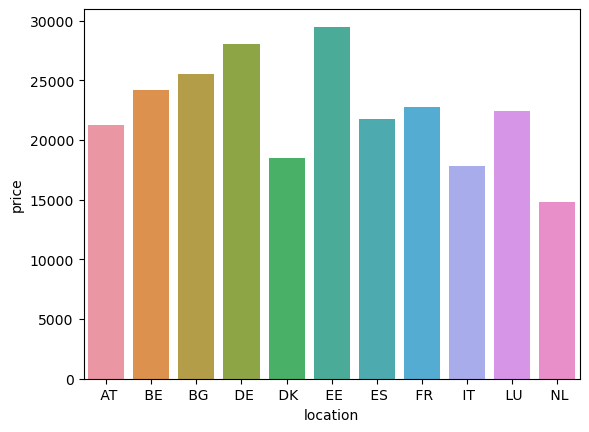

In [429]:
sns.barplot(x=df.groupby("location")["price"].mean().index,y=df.groupby("location")["price"].mean())

In [430]:
df.drop('location',axis=1,inplace=True)

### fuel_type	

In [431]:
df.fuel_type.value_counts(dropna=False)

benzine        15957
diesel          7095
gas_benzine      753
gas              432
electric         315
Name: fuel_type, dtype: int64

<Axes: xlabel='fuel_type', ylabel='price'>

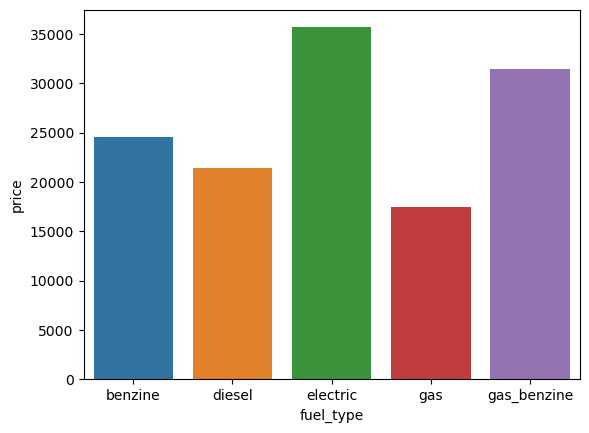

In [432]:
sns.barplot(x=df.groupby("fuel_type")["price"].mean().index,y=df.groupby("fuel_type")["price"].mean())

### colour

In [433]:
df.colour.value_counts(dropna=False)

Black     5989
Grey      5907
White     4754
Blue      2902
Red       1916
Silver    1387
Green      409
Brown      391
Orange     259
Beige      223
Yellow     213
Violet      93
Bronze      62
Gold        47
Name: colour, dtype: int64

<Axes: xlabel='colour', ylabel='price'>

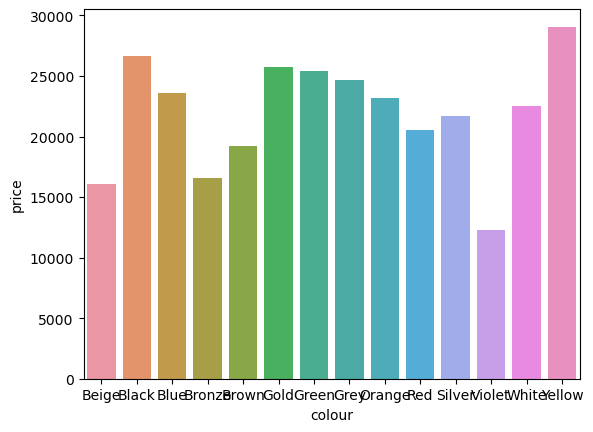

In [434]:
sns.barplot(x=df.groupby("colour")["price"].mean().index,y=df.groupby("colour")["price"].mean())

In [435]:
df.drop('colour',axis=1,inplace=True)

### seller

In [436]:
df.seller.value_counts(dropna=False)

Dealer            22442
Private seller     2110
Name: seller, dtype: int64

<Axes: xlabel='seller', ylabel='price'>

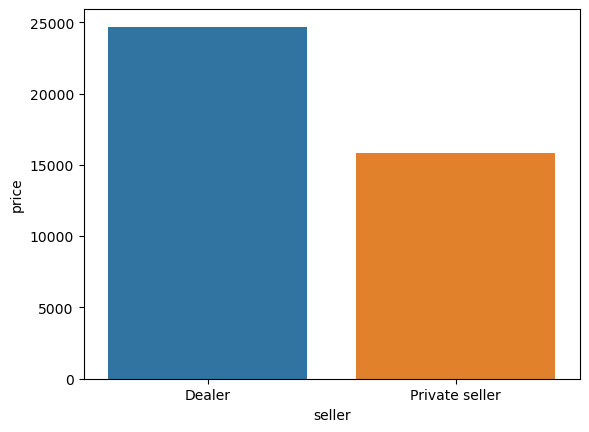

In [437]:
sns.barplot(x=df.groupby("seller")["price"].mean().index,y=df.groupby("seller")["price"].mean())

### seats

In [438]:
df.seats.value_counts(dropna=False)

5.00     17827
4.00      5167
2.00      1081
7.00       346
8.00        43
9.00        35
3.00        24
6.00        12
0.00         9
1.00         6
17.00        2
Name: seats, dtype: int64

In [439]:
df[df['seats']==17]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
4094,Opel,59990.00,Station wagon,Used,290.00,Manual,diesel,Dealer,17.00,120.00,2299.00,6.00,147.00,Rear,4.00,1403.00,1,Euro 6,Black,Cloth,1.00,0.00,5.15,Standard,Standard Media,Standard_extras,Safety Standard Package
4099,Opel,59990.00,Station wagon,Used,300.00,Manual,diesel,Dealer,17.00,120.00,2299.00,6.00,147.00,Rear,4.00,1403.00,1,Euro 6,Black,Cloth,1.00,0.00,4.65,Standard,Standard Media,Standard_extras,Safety Standard Package


In [440]:
df[df['seats']==1]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
4953,Renault,6500.00,Compact,Used,21400.00,Automatic,diesel,Dealer,1.00,1.00,999.00,1.00,90.00,Rear,3.00,1477.00,0,Euro 6,Black,Other,1.00,4.00,5.30,Standard,Standard Media,Standard_extras,Safety Standard Package
5589,Renault,3999.00,Coupe,Used,91900.00,Automatic,diesel,Private seller,1.00,8.00,1998.00,1.00,126.00,Front,4.00,562.00,0,Euro 5,Black,Part leather,3.00,7.00,5.65,Standard,Standard Media,Premium_extras,Safety Standard Package
5969,Renault,7950.00,Off-Road/Pick-up,Used,35784.00,Automatic,diesel,Dealer,1.00,103.00,1332.00,7.00,103.00,Rear,4.00,375.00,1,Euro 6,Black,Part leather,3.00,6.00,5.65,Standard,Standard Media,Standard_extras,Safety Standard Package
7229,Peugeot,10750.00,Convertible,Used,82000.00,Manual,diesel,Dealer,1.00,100.00,1997.00,6.00,173.00,Front,4.00,1620.00,1,Euro 5,Black,Full leather,2.00,12.00,6.25,Standard,Premium Media,Standard_extras,Safety Standard Package
9804,Fiat,24500.00,Coupe,Used,1.00,Manual,benzine,Dealer,1.00,109.00,2000.00,5.00,0.00,Rear,4.00,1200.00,0,Euro 2,Red,alcantara,1.00,34.00,9.20,Standard,Premium Media,Standard_extras,Safety Premium Package
23280,Volvo,126950.00,Coupe,Used,1.00,Manual,benzine,Dealer,1.00,246.00,1560.00,1.00,167.00,Rear,4.00,1254.00,0,Euro 4,Black,Cloth,1.00,40.00,5.55,Standard,Standard Media,Premium Plus_extras,Safety Standard Package


In [441]:
df[df['seats']==0]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
4650,Renault,7750.00,Compact,Used,53335.00,Manual,benzine,Dealer,0.00,52.00,999.00,5.00,105.00,Front,3.00,939.00,0,Euro 6,Black,Cloth,3.00,7.00,4.95,Standard,Standard Media,Standard_extras,Safety Standard Package
11172,SEAT,9900.00,Compact,Used,132390.00,Manual,benzine,Dealer,0.00,103.00,1395.00,6.00,0.00,Front,4.00,1167.00,0,Euro 5,Black,Cloth,1.00,7.00,4.95,Standard,Standard Media,Standard_extras,Safety Standard Package
11282,SEAT,14700.00,Compact,Used,66510.00,Manual,benzine,Dealer,0.00,85.00,999.00,6.00,0.00,Front,3.00,1140.00,0,Euro 6,Black,Cloth,1.00,4.00,4.95,Standard,Standard Media,Premium Plus_extras,Safety Premium Plus Package
11563,SEAT,10900.00,Coupe,Used,43231.00,Manual,benzine,Dealer,0.00,66.00,1197.00,5.00,0.00,Front,4.00,990.00,0,Euro 6,Grey,Cloth,2.00,6.00,5.45,Standard,Standard Media,Standard_extras,Safety Standard Package
12622,SEAT,7650.00,Sedan,Used,124800.00,Manual,benzine,Dealer,0.00,63.00,1197.00,5.00,0.00,Front,4.00,1155.00,0,Euro 5,Black,Cloth,2.00,8.00,5.45,Standard,Standard Media,Standard_extras,Safety Standard Package
12670,SEAT,18950.00,Sedan,Used,11400.00,Manual,benzine,Dealer,0.00,70.00,999.00,6.00,104.00,Front,3.00,1099.00,1,Euro 6d-TEMP,Black,Cloth,1.00,2.00,4.80,Premium,Standard Media,Standard_extras,Safety Standard Package
14026,Skoda,2900.00,Sedan,Used,197000.00,Manual,benzine,Dealer,0.00,77.00,1598.00,5.00,0.00,Front,4.00,1130.00,0,Euro 4,Black,Cloth,2.00,13.00,7.35,Standard,Standard Media,Standard_extras,Safety Standard Package
14148,Skoda,2950.00,Sedan,Used,139877.00,Manual,benzine,Dealer,0.00,63.00,1390.00,5.00,0.00,Front,4.00,1230.00,0,Euro 4,Black,Cloth,2.00,14.00,6.95,Standard,Standard Media,Standard_extras,Safety Standard Package
22176,Hyundai,8900.00,Station wagon,Used,114730.00,Manual,diesel,Dealer,0.00,66.00,1396.00,5.00,0.00,Front,4.00,1397.00,0,Euro 5,Black,Cloth,1.00,8.00,4.65,Standard,Standard Media,Standard_extras,Safety Standard Package


In [442]:
setat_change_list = [8,9,3,0,17,1,6]

In [443]:
df.seats.replace(setat_change_list, np.nan,inplace=True)

In [444]:
fill_bymode_double(df, 'make', 'body_type', 'seats')

In [445]:
df.seats.value_counts(dropna=False)

5.00    17946
4.00     5178
2.00     1082
7.00      346
Name: seats, dtype: int64

<Axes: xlabel='seats', ylabel='price'>

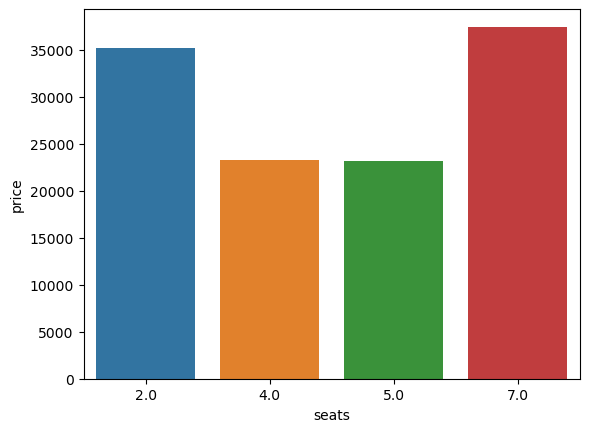

In [446]:
sns.barplot(x=df.groupby("seats")["price"].mean().index,y=df.groupby("seats")["price"].mean())

### power

In [447]:
df.power.value_counts(dropna=False)

110.00    1759
96.00     1362
66.00     1012
81.00      975
85.00      948
          ... 
164.00       1
409.00       1
746.00       1
570.00       1
10.00        1
Name: power, Length: 351, dtype: int64

In [448]:
df.power.describe()

count   24552.00
mean      120.14
std        70.57
min         1.00
25%        80.00
50%       100.00
75%       135.00
max       924.00
Name: power, dtype: float64

In [449]:
df.power.sort_values().head(20)

5206     1.00
19451    1.00
7227     1.00
3101     1.00
4953     1.00
20142    3.00
5522     4.00
5707     4.00
22253    6.00
5320     7.00
8846     7.00
5690     8.00
5723     8.00
5589     8.00
4920     9.00
10094    9.00
10037   10.00
4622    12.00
5608    12.00
10099   13.00
Name: power, dtype: float64

In [450]:
df.power.unique()

array([100., 215., 310., 225.,  90., 140., 102.,  66., 280., 155.,  85.,
        80., 118., 120., 143., 265., 160., 125., 110., 173.,  70., 410.,
       270., 470., 320., 385., 271., 266., 202., 375., 279., 165., 471.,
        75., 132., 130., 121., 115., 228.,  67.,  79., 101., 142., 112.,
       122.,  87.,  81., 195., 136., 103., 135., 235., 350., 250., 245.,
       150., 200., 420., 285., 390., 450., 384., 287., 232., 180., 240.,
       170., 185., 430., 380., 340., 368., 243., 345., 335., 175., 190.,
       138., 145., 116., 210., 218.,  77., 386., 336., 290., 409., 203.,
       148., 146., 346.,  63.,  78., 169., 358., 354., 300., 220., 286.,
       537., 162., 147., 588., 463., 105., 360., 400., 184., 373., 330.,
        99., 168., 139., 484., 295., 176., 154., 174.,  95., 378., 206.,
       370., 205., 325.,  97.,  55., 177.,  51., 152.,  74.,  64.,  73.,
        92.,  96.,  54.,  43.,  59.,  44., 104.,  88.,  65., 114.,  82.,
       194., 229., 224., 127., 108., 231.,  76., 29

In [451]:
df.power.nunique()

351

In [454]:
df[df['power']<40]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
3083,Opel,15990.00,Coupe,Used,78000.00,Manual,benzine,Dealer,5.00,33.00,1488.00,3.00,161.00,Rear,4.00,1245.00,0,Euro 4,Black,Cloth,2.00,65.00,7.60,Standard,Premium Media,Premium Plus_extras,Safety Standard Package
3101,Opel,45000.00,Coupe,Used,1.00,Manual,benzine,Private seller,5.00,1.00,1900.00,5.00,161.00,Rear,4.00,940.00,0,Euro 4,Black,Cloth,1.00,46.00,7.35,Premium,Standard Media,Standard_extras,Safety Standard Package
3150,Opel,8980.00,Coupe,Used,30830.00,Manual,benzine,Dealer,5.00,33.00,1100.00,5.00,161.00,Front,4.00,1245.00,0,Euro 4,Black,Velour,2.00,53.00,6.60,Standard,Standard Media,Standard_extras,Safety Standard Package
3183,Opel,17000.00,Coupe,Used,52466.00,Manual,benzine,Private seller,4.00,33.00,1500.00,5.00,161.00,Rear,4.00,1270.00,0,Euro 4,Blue,Cloth,1.00,72.00,6.20,Standard,Premium Media,Standard_extras,Safety Standard Package
3218,Opel,9750.00,Coupe,Used,104205.00,Manual,benzine,Dealer,5.00,38.00,1200.00,4.00,161.00,Rear,4.00,1245.00,0,Euro 4,Black,Full leather,2.00,47.00,7.05,Standard,Standard Media,Standard_extras,Safety Standard Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20142,Ford,28990.00,Off-Road/Pick-up,Pre-registered,10.00,Manual,diesel,Dealer,5.00,3.00,1500.00,6.00,107.00,4WD,4.00,1680.00,1,Euro 6d,Black,Cloth,1.00,1.00,6.10,Premium,Premium Media,Standard_extras,Safety Premium Plus Package
22253,Hyundai,12795.00,Station wagon,Used,85000.00,Manual,benzine,Dealer,5.00,6.00,998.00,6.00,124.00,Front,3.00,1241.00,1,Euro 6d-TEMP,Black,Cloth,1.00,3.00,5.15,Standard,Standard Media,Standard_extras,Safety Standard Package
22624,Hyundai,37500.00,Sedan,Used,10.00,Automatic,benzine,Dealer,5.00,39.00,998.00,6.00,124.00,Front,3.00,1083.00,1,Euro 6d,Black,Cloth,1.00,0.00,5.10,Standard,Premium Media,Standard_extras,Safety Standard Package
23373,Volvo,19900.00,Coupe,Used,99300.00,Manual,benzine,Dealer,4.00,32.00,1560.00,5.00,167.00,Front,4.00,1254.00,0,Euro 4,Black,Cloth,1.00,68.00,5.20,Standard,Standard Media,Standard_extras,Safety Premium Plus Package


In [456]:
df[df['power']<39].shape

(133, 27)

In [457]:
df.power.loc[(df['power']<39)] = np.nan

In [458]:
df.power.isna().sum()

133

In [460]:
fill_bymode_double(df, 'make', 'body_type', 'power')

In [461]:
df.power.isna().sum()

0

In [464]:
df[df.power>350]['power'].value_counts()

375.00    51
430.00    42
419.00    34
450.00    29
410.00    24
404.00    14
386.00    11
390.00    10
559.00     9
405.00     9
385.00     8
370.00     7
380.00     7
368.00     6
392.00     6
470.00     6
353.00     6
357.00     5
360.00     5
420.00     4
441.00     4
487.00     4
400.00     4
484.00     3
588.00     3
567.00     3
387.00     3
363.00     2
358.00     2
354.00     2
463.00     2
412.00     2
662.00     2
552.00     2
527.00     1
551.00     1
365.00     1
499.00     1
372.00     1
493.00     1
403.00     1
530.00     1
746.00     1
496.00     1
664.00     1
600.00     1
478.00     1
810.00     1
665.00     1
883.00     1
570.00     1
924.00     1
378.00     1
373.00     1
537.00     1
409.00     1
384.00     1
471.00     1
485.00     1
Name: power, dtype: int64

In [474]:
df[df.power>600]['power']

15887   662.00
15909   924.00
17533   746.00
17666   883.00
17670   665.00
17695   810.00
17779   664.00
19849   662.00
Name: power, dtype: float64

In [477]:
df[df.power>600]['power'] = np.nan

In [478]:
fill_bymode_double(df, 'make', 'body_type', 'power')

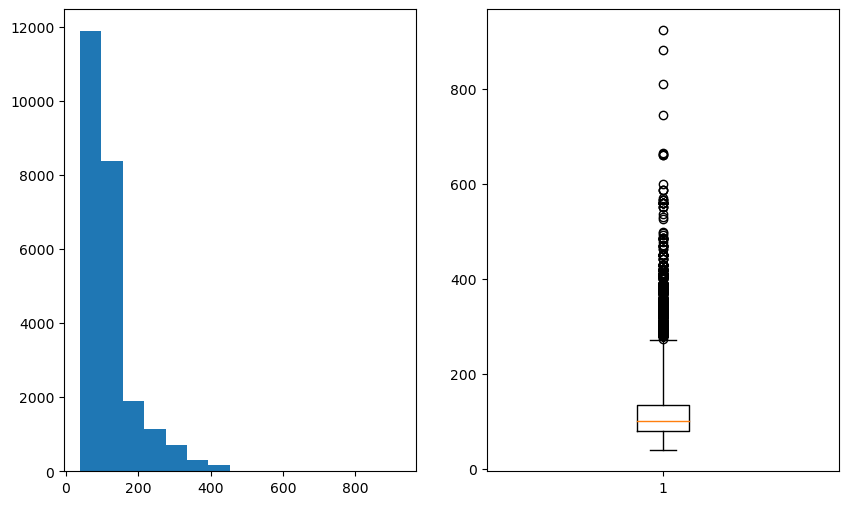

In [479]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.power, bins=15)

plt.subplot(122)
plt.boxplot(df.power, whis=2.5)

plt.show()

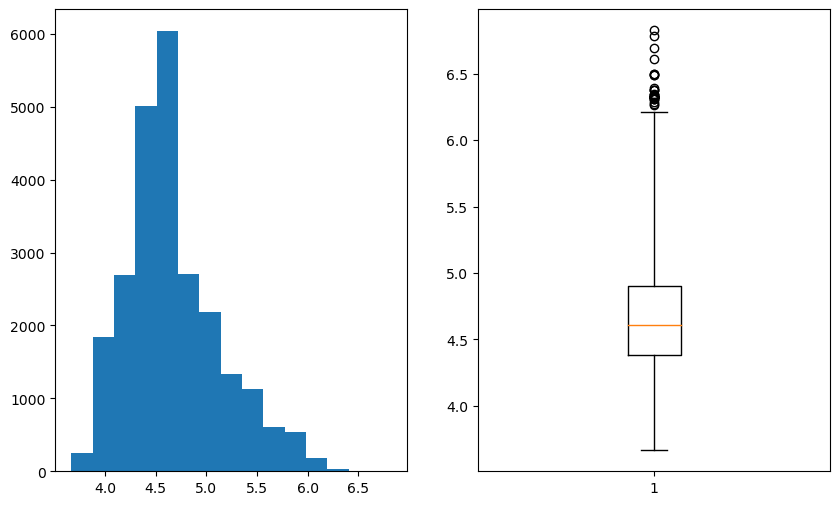

In [480]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.power), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.power), whis=2.5)

plt.show()

In [481]:
df.power.isna().sum()

0

### engine_size

In [482]:
df.engine_size.value_counts(dropna=False)

999.00     2031
1598.00    2025
1998.00    1044
1461.00    1035
1969.00     995
           ... 
200.00        1
2935.00       1
3224.00       1
987.00        1
2473.00       1
Name: engine_size, Length: 467, dtype: int64

In [483]:
df.engine_size.describe()

count   24552.00
mean     1763.55
std      1093.94
min         0.00
25%      1248.00
50%      1598.00
75%      1991.00
max     99900.00
Name: engine_size, dtype: float64

In [498]:
df[df.engine_size < 700]['engine_size'].value_counts()

0.00      105
1.00       35
2.00        8
499.00      4
500.00      2
4.00        2
650.00      2
5.00        2
652.00      2
698.00      1
300.00      1
600.00      1
20.00       1
549.00      1
200.00      1
332.00      1
289.00      1
498.00      1
Name: engine_size, dtype: int64

In [500]:
df[df.engine_size > 6000]['engine_size'].value_counts()

6208.00     12
6300.00      2
6400.00      2
6209.00      1
19194.00     1
16998.00     1
16597.00     1
99900.00     1
54009.00     1
6276.00      1
6387.00      1
6294.00      1
8660.00      1
6653.00      1
Name: engine_size, dtype: int64

In [503]:
df[df.engine_size == 6400]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
19424,Ford,49500.00,Convertible,Used,47470.00,Automatic,benzine,Private seller,4.00,224.00,6400.00,3.00,273.00,Rear,8.00,2095.00,0,Euro 6,Black,Full leather,3.00,59.00,4.45,Standard,Standard Media,Standard_extras,Safety Standard Package
19731,Ford,91990.00,Coupe,Used,1652.00,Manual,benzine,Dealer,4.00,238.00,6400.00,4.00,250.00,Rear,8.00,1445.00,0,Euro 1,Black,Full leather,3.00,54.00,10.20,Standard,Standard Media,Standard_extras,Safety Standard Package


In [504]:
cond = (df.engine_size < 700) | (df.engine_size > 6400)

In [507]:
df.engine_size.loc[cond] = np.nan

In [508]:
fill_bymode_double(df, 'make', 'body_type', 'engine_size')

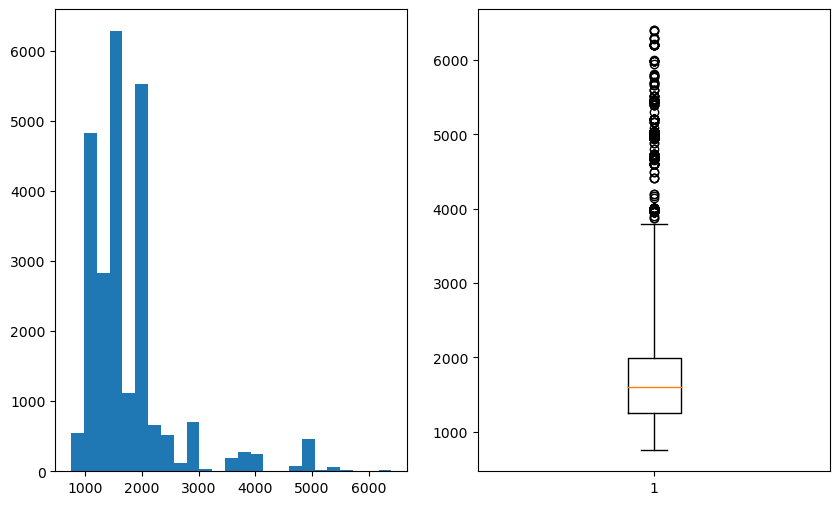

In [510]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.engine_size, bins=25)

plt.subplot(122)
plt.boxplot(df.engine_size, whis=2.5)

plt.show()

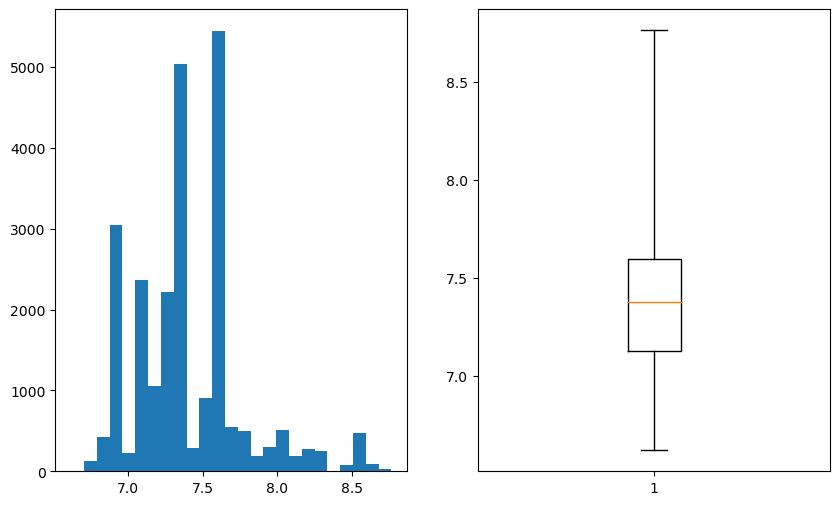

In [511]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.engine_size), bins=25)

plt.subplot(122)
plt.boxplot(np.log(df.engine_size), whis=2.5)

plt.show()

### gears

In [512]:
df.gears.value_counts()

6.00     10442
5.00      6446
7.00      2395
8.00      2109
9.00      1421
1.00      1195
4.00       274
10.00      216
0.00        28
3.00        24
2.00         2
Name: gears, dtype: int64

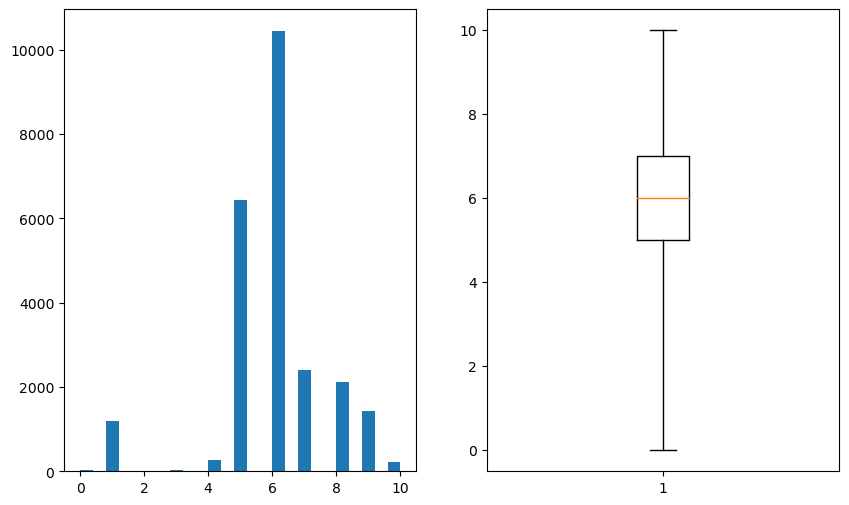

In [526]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.gears, bins=25)

plt.subplot(122)
plt.boxplot(df.gears, whis=2.5)

plt.show()

In [525]:
df[df.gears == 0]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,cylinders,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
1142,Mercedes-Benz,47500.00,Coupe,Used,63096.00,Automatic,diesel,Dealer,5.00,180.00,1950.00,0.00,140.00,Rear,4.00,1690.00,1,Euro 6,Black,Full leather,1.00,3.00,5.55,Standard,Premium Media,Premium Plus_extras,Safety Standard Package
1357,Mercedes-Benz,102900.00,Off-Road/Pick-up,Used,79349.00,Automatic,diesel,Dealer,5.00,243.00,2925.00,0.00,208.00,4WD,6.00,2265.00,1,Euro 6d,Black,Full leather,1.00,2.00,7.40,Standard,Premium Media,Premium Plus_extras,Safety Premium Package
4902,Renault,21988.00,Compact,Used,55673.00,Automatic,benzine,Dealer,5.00,80.00,999.00,0.00,0.00,Front,0.00,1575.00,1,Euro 6,Other,Cloth,1.00,3.00,5.30,Standard,Premium Media,Standard_extras,Safety Standard Package
5975,Renault,21788.00,Off-Road/Pick-up,Used,40000.00,Automatic,benzine,Dealer,5.00,117.00,1332.00,0.00,154.00,Front,4.00,1437.00,1,Euro 6d-TEMP,Other,Cloth,1.00,2.00,6.20,Standard,Premium Media,Standard_extras,Safety Premium Package
8694,Peugeot,14990.00,Station wagon,Used,60926.00,Automatic,electric,Dealer,5.00,49.00,1199.00,0.00,1.00,Front,4.00,1370.00,1,Euro 6,Black,Cloth,1.00,4.00,4.70,Standard,Standard Media,Standard_extras,Safety Standard Package
9342,Fiat,27765.00,Compact,Used,11100.00,Automatic,benzine,Dealer,4.00,87.00,1242.00,0.00,88.00,Front,0.00,1365.00,1,Euro 6d-TEMP,Other,Cloth,1.00,1.00,5.35,Standard,Premium Media,Standard_extras,Safety Standard Package
11986,SEAT,33788.00,Off-Road/Pick-up,Used,9730.00,Automatic,diesel,Dealer,5.00,110.00,1968.00,0.00,186.00,4WD,4.00,1803.00,1,Euro 6d-TEMP,Black,Cloth,1.00,3.00,5.70,Standard,Premium Media,Standard_extras,Safety Premium Package
14149,Skoda,36488.00,Sedan,Pre-registered,10.00,Automatic,benzine,Dealer,5.00,180.00,1984.00,0.00,129.00,Front,4.00,1520.00,1,Euro 6d,Other,Cloth,1.00,0.00,7.00,Standard,Premium Media,Standard_extras,Safety Premium Package
16465,Toyota,18950.00,Off-Road/Pick-up,Used,96167.00,Automatic,benzine,Dealer,5.00,90.00,1798.00,0.00,92.00,Front,4.00,1420.00,0,Euro 6,Black,Cloth,1.00,4.00,3.70,Standard,Standard Media,Standard_extras,Safety Standard Package
16480,Toyota,32800.00,Off-Road/Pick-up,Demonstration,19800.00,Automatic,gas_benzine,Dealer,5.00,135.00,1987.00,0.00,92.00,Front,4.00,1485.00,1,Euro 6,Black,Part leather,1.00,1.00,4.55,Standard,Standard Media,Standard_extras,Safety Standard Package


In [524]:
df[(df.gears == 1) & (df.gearbox == 'Manual')]['gears'] 

4794    1.00
6641    1.00
10907   1.00
14004   1.00
15672   1.00
18264   1.00
18458   1.00
18483   1.00
19405   1.00
21795   1.00
23280   1.00
Name: gears, dtype: float64

In [531]:
df[(df.gears != 1) & (df.gearbox == 'Automatic')]['gears'].value_counts()

7.00     2371
8.00     2103
6.00     1906
9.00     1420
5.00      361
10.00     215
4.00      144
0.00       26
3.00       18
2.00        1
Name: gears, dtype: int64

### co_emissions	

In [532]:
df.co_emissions.value_counts()

0.00      2015
115.00     607
124.00     577
119.00     561
99.00      533
          ... 
70.00        1
326.00       1
342.00       1
398.00       1
53.00        1
Name: co_emissions, Length: 333, dtype: int64

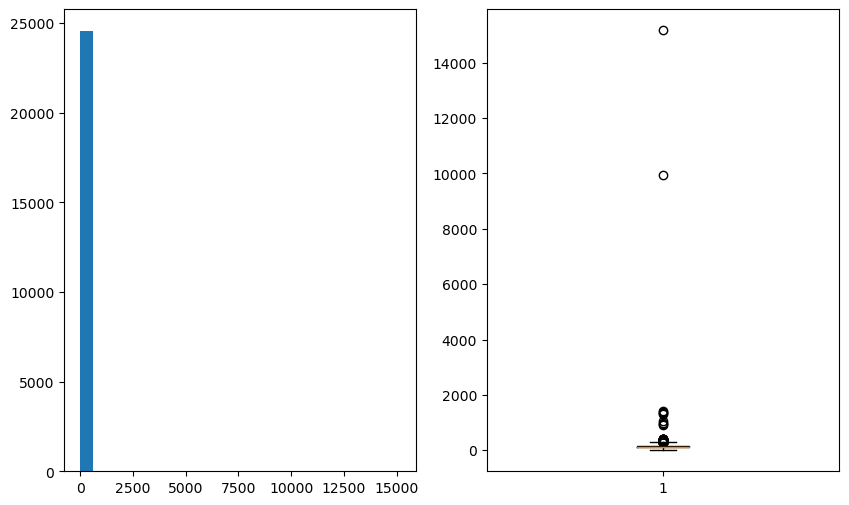

In [533]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.co_emissions, bins=25)

plt.subplot(122)
plt.boxplot(df.co_emissions, whis=2.5)

plt.show()

In [534]:
df.co_emissions.describe()

count   24552.00
mean      129.23
std       131.36
min         0.00
25%       102.00
50%       124.00
75%       156.00
max     15168.00
Name: co_emissions, dtype: float64

In [535]:
df.co_emissions.sort_values().head(20)

6794    0.00
1385    0.00
3671    0.00
8034    0.00
2445    0.00
1381    0.00
1380    0.00
2447    0.00
10914   0.00
15596   0.00
20860   0.00
1375    0.00
10907   0.00
6248    0.00
2442    0.00
8072    0.00
10905   0.00
2453    0.00
15607   0.00
8143    0.00
Name: co_emissions, dtype: float64

In [556]:
df.co_emissions.sort_values().tail(20)

1498      348.00
19631     350.00
1459      373.00
1260      377.00
19647     394.00
17718     398.00
19619     399.00
589       400.00
23828     414.00
19969     420.00
18887     910.00
20054     940.00
23407    1000.00
8862     1060.00
11026    1320.00
4354     1360.00
9722     1390.00
16573    1410.00
18975    9954.00
9469    15168.00
Name: co_emissions, dtype: float64

In [567]:
df[df.co_emissions>300]['co_emissions'].shape

(94,)

In [569]:
df.loc[(df.co_emissions>300),'co_emissions'] = np.nan

In [571]:
fill_bymode_double(df, 'make', 'body_type', 'co_emissions')

In [572]:
df.co_emissions.isna().sum()

0

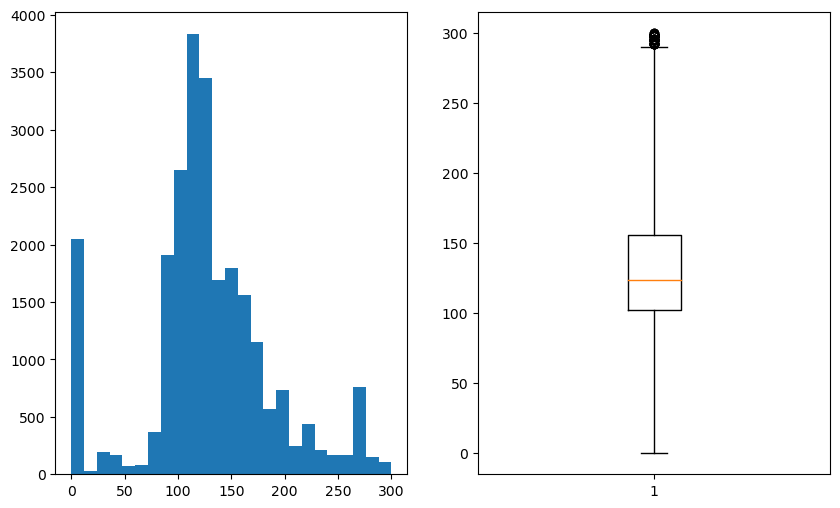

In [573]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.co_emissions, bins=25)

plt.subplot(122)
plt.boxplot(df.co_emissions, whis=2.5)

plt.show()

In [574]:
df.co_emissions.describe()

count   24552.00
mean      127.38
std        60.39
min         0.00
25%       102.00
50%       124.00
75%       156.00
max       300.00
Name: co_emissions, dtype: float64

### drivetrain

In [575]:
df.drivetrain.value_counts(dropna=False)

 Front     18327
 4WD        3786
 Rear       2439
Name: drivetrain, dtype: int64

<Axes: xlabel='drivetrain', ylabel='price'>

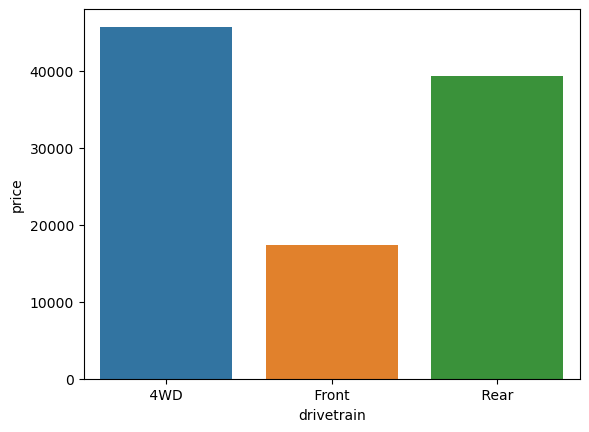

In [576]:
sns.barplot(x=df.groupby("drivetrain")["price"].mean().index,y=df.groupby("drivetrain")["price"].mean())

### cylinders

In [577]:
df.cylinders.value_counts(dropna=False)

4.00     16799
3.00      4860
6.00      1250
8.00       891
5.00       539
2.00       120
0.00        50
1.00        24
12.00        9
7.00         8
26.00        1
16.00        1
Name: cylinders, dtype: int64

<Axes: xlabel='cylinders', ylabel='price'>

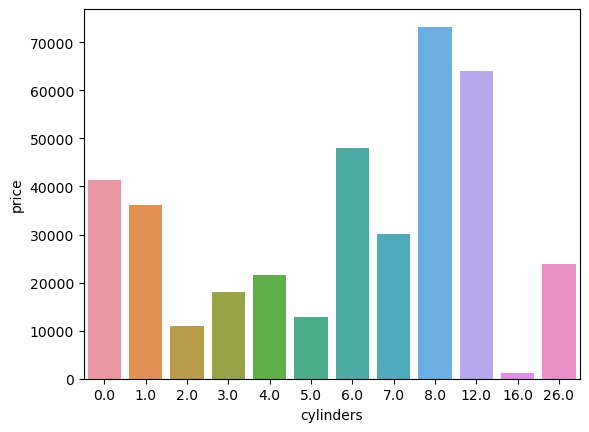

In [578]:
sns.barplot(x=df.groupby("cylinders")["price"].mean().index,y=df.groupby("cylinders")["price"].mean())

In [579]:
df.drop("cylinders",axis=1,inplace=True)

### empty_weight	

In [580]:
df.empty_weight.value_counts(dropna=False)

1165.00    523
1320.00    454
1395.00    405
1055.00    401
1735.00    276
          ... 
2255.00      1
2146.00      1
1862.00      1
1563.00      1
1391.00      1
Name: empty_weight, Length: 1218, dtype: int64

In [585]:
df.empty_weight.describe()

count   24552.00
mean     1412.52
std       326.55
min        75.00
25%      1188.00
50%      1372.00
75%      1584.00
max     15590.00
Name: empty_weight, dtype: float64

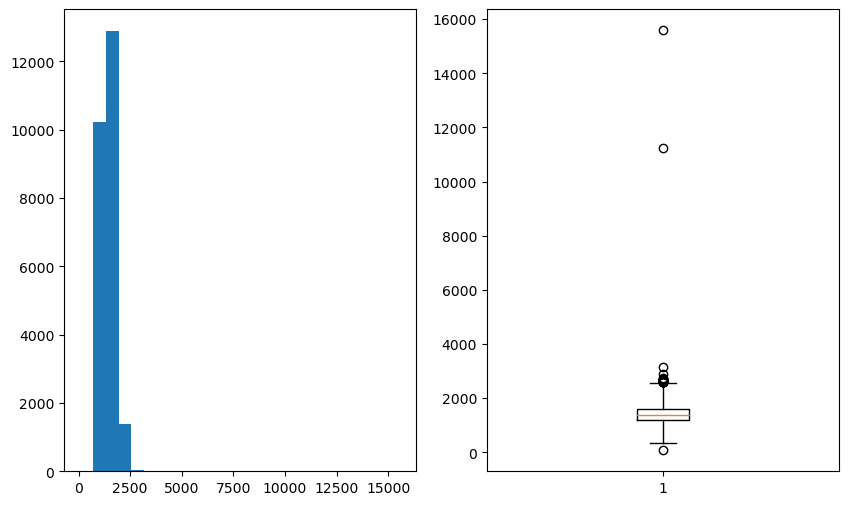

In [582]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.empty_weight, bins=25)

plt.subplot(122)
plt.boxplot(df.empty_weight, whis=2.5)

plt.show()

In [583]:
df.empty_weight.sort_values().head(30)

13070    75.00
5931    347.00
5969    375.00
4670    473.00
5559    474.00
3990    525.00
5589    562.00
5527    562.00
5707    562.00
4920    562.00
11401   600.00
11399   600.00
10072   600.00
5369    650.00
11048   670.00
11402   680.00
9205    680.00
9351    680.00
7667    680.00
15782   695.00
10068   700.00
17439   710.00
9229    710.00
11355   719.00
9868    720.00
17071   720.00
10093   740.00
3043    762.00
6952    765.00
7043    775.00
Name: empty_weight, dtype: float64

In [584]:
df.empty_weight.sort_values().tail(30)

1214     2560.00
1551     2560.00
1750     2565.00
2042     2580.00
1219     2580.00
1472     2580.00
2032     2585.00
20159    2585.00
1952     2585.00
20124    2585.00
20279    2585.00
2028     2585.00
1948     2585.00
1231     2595.00
1334     2595.00
1294     2610.00
1438     2610.00
1407     2612.00
16442    2650.00
2101     2655.00
2142     2680.00
1584     2680.00
1162     2690.00
2305     2712.00
16428    2725.00
5190     2750.00
18219    2900.00
1256     3150.00
19224   11246.00
6603    15590.00
Name: empty_weight, dtype: float64

In [590]:
df[df.empty_weight>3500]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
6603,Renault,16590.00,Sedan,Used,24482.00,Automatic,benzine,Dealer,5.00,43.00,1461.00,1.00,0.00,Front,15590.00,1,Euro 6,Black,Cloth,1.00,3.00,3.80,Standard,Standard Media,Standard_extras,Safety Standard Package
19224,Ford,20980.00,Compact,Employee's car,17724.00,Manual,benzine,Dealer,5.00,92.00,999.00,6.00,0.00,Front,11246.00,1,Euro 6d,Black,Cloth,1.00,1.00,4.80,Premium,Premium Media,Standard_extras,Safety Premium Package


In [592]:
df[df.empty_weight<600]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
3990,Opel,23450.00,Station wagon,Used,38847.00,Manual,benzine,Dealer,5.00,96.00,1199.00,6.00,104.00,Front,525.00,1,Euro 6d,Black,Part leather,1.00,1.00,4.75,Premium,Premium Media,Standard_extras,Safety Premium Package
4670,Renault,10390.00,Compact,Pre-registered,10.00,Automatic,electric,Dealer,2.00,66.00,999.00,1.00,0.00,Rear,473.00,1,Euro 6d,Black,Cloth,1.00,1.00,4.90,Standard,Premium Media,Standard_extras,Safety Standard Package
4920,Renault,14990.00,Compact,Used,4500.00,Automatic,benzine,Dealer,2.00,66.00,999.00,1.00,0.00,Front,562.00,1,Euro 6d-TEMP,Black,Cloth,1.00,0.00,4.70,Standard,Standard Media,Standard_extras,Safety Standard Package
5527,Renault,9500.00,Coupe,Used,100000.00,Manual,benzine,Private seller,5.00,43.00,1400.00,5.00,195.00,Front,562.00,1,Euro 1,Black,Cloth,2.00,32.00,6.25,Standard,Standard Media,Standard_extras,Safety Premium Plus Package
5559,Renault,11999.00,Coupe,Used,30254.00,Automatic,benzine,Dealer,2.00,110.00,1998.00,7.00,195.00,Front,474.00,1,Euro 6,Black,Part leather,1.00,3.00,5.35,Standard,Standard Media,Premium Plus_extras,Safety Standard Package
5589,Renault,3999.00,Coupe,Used,91900.00,Automatic,diesel,Private seller,5.00,110.00,1998.00,1.00,126.00,Front,562.00,0,Euro 5,Black,Part leather,3.00,7.00,5.65,Standard,Standard Media,Premium_extras,Safety Standard Package
5707,Renault,8500.00,Coupe,Used,10300.00,Automatic,benzine,Private seller,2.00,110.00,1400.00,1.00,195.00,Front,562.00,1,Euro 6d-TEMP,Black,Cloth,1.00,2.00,6.20,Standard,Standard Media,Premium_extras,Safety Standard Package
5931,Renault,7445.00,Off-Road/Pick-up,Used,23362.00,Automatic,benzine,Dealer,2.00,103.00,1332.00,1.00,124.00,Rear,347.00,1,Euro 5,Black,Full leather,2.00,10.00,5.60,Standard,Standard Media,Standard_extras,Safety Standard Package
5969,Renault,7950.00,Off-Road/Pick-up,Used,35784.00,Automatic,diesel,Dealer,5.00,103.00,1332.00,7.00,103.00,Rear,375.00,1,Euro 6,Black,Part leather,3.00,6.00,5.65,Standard,Standard Media,Standard_extras,Safety Standard Package
13070,Skoda,74490.00,Off-Road/Pick-up,Employee's car,3500.00,Automatic,benzine,Dealer,5.00,195.00,1968.00,7.00,113.00,4WD,75.00,1,Euro 6d,Black,alcantara,1.00,0.00,5.35,Standard,Premium Media,Standard_extras,Safety Standard Package


In [604]:
df.loc[((df.empty_weight>3500)|(df.empty_weight<680)),'empty_weight'] = np.nan

In [606]:
fill_bymode_double(df, 'make', 'body_type', 'empty_weight')

In [607]:
df.empty_weight.isna().sum()

0

In [609]:
df[df.empty_weight>2700].shape

(5, 26)

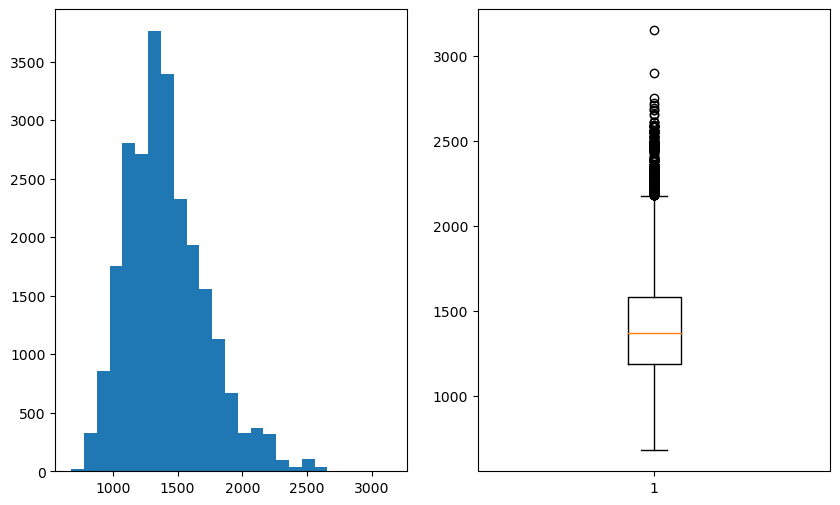

In [610]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.empty_weight, bins=25)

plt.subplot(122)
plt.boxplot(df.empty_weight, whis=1.5)

plt.show()

In [615]:
df[df.empty_weight>2550].shape

(47, 26)

In [617]:
df[df.empty_weight>2525]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,emission_class,upholstery_colour,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
1162,Mercedes-Benz,103885.00,Coupe,Demonstration,7900.00,Automatic,gas_benzine,Dealer,5.00,143.00,1950.00,9.00,24.00,4WD,2690.00,1,Euro 6d,Black,Full leather,1.00,0.00,5.00,Standard,Premium Media,Premium Plus_extras,Safety Premium Package
1175,Mercedes-Benz,696900.00,Off-Road/Pick-up,Pre-registered,100.00,Automatic,benzine,Dealer,5.00,430.00,3982.00,9.00,220.00,4WD,2560.00,1,Euro 6d,Black,Full leather,1.00,0.00,11.85,Standard,Premium Media,Standard_extras,Safety Standard Package
1196,Mercedes-Benz,153990.00,Off-Road/Pick-up,Used,20000.00,Automatic,benzine,Dealer,5.00,450.00,3982.00,9.00,262.00,4WD,2538.00,1,Euro 6d-TEMP,Black,Full leather,1.00,1.00,11.85,Premium,Premium Media,Premium Plus_extras,Safety Premium Package
1208,Mercedes-Benz,18780.00,Off-Road/Pick-up,Used,242144.00,Automatic,diesel,Dealer,5.00,155.00,2987.00,7.00,264.00,4WD,2545.00,0,Euro 6,Black,Full leather,3.00,11.00,10.65,Premium,Standard Media,Standard_extras,Safety Standard Package
1210,Mercedes-Benz,99980.00,Off-Road/Pick-up,Used,23521.00,Automatic,benzine,Dealer,5.00,400.00,5461.00,7.00,129.00,4WD,2550.00,1,Euro 5,Black,Full leather,2.00,7.00,9.65,Premium,Standard Media,Premium Plus_extras,Safety Standard Package
1214,Mercedes-Benz,92950.00,Off-Road/Pick-up,Used,11353.00,Automatic,benzine,Dealer,5.00,350.00,3982.00,9.00,283.00,4WD,2560.00,1,Euro 6,Black,Part leather,1.00,1.00,11.85,Standard,Standard Media,Premium Plus_extras,Safety Premium Package
1219,Mercedes-Benz,46900.00,Off-Road/Pick-up,Used,211261.00,Automatic,benzine,Dealer,5.00,430.00,5461.00,7.00,288.00,4WD,2580.00,1,Euro 6,Black,Full leather,1.00,6.00,9.65,Premium,Premium Media,Premium Plus_extras,Safety Premium Package
1231,Mercedes-Benz,121463.00,Off-Road/Pick-up,Used,41731.00,Automatic,benzine,Dealer,5.00,310.00,3982.00,7.00,220.00,4WD,2595.00,1,Euro 6,Grey,Full leather,2.00,4.00,11.85,Premium,Premium Media,Premium Plus_extras,Safety Standard Package
1256,Mercedes-Benz,175870.00,Off-Road/Pick-up,Used,45672.00,Automatic,benzine,Dealer,5.00,310.00,3982.00,9.00,263.00,4WD,3150.00,1,Euro 6,Black,Full leather,2.00,3.00,11.85,Premium,Premium Media,Premium Plus_extras,Safety Standard Package
1266,Mercedes-Benz,344900.00,Off-Road/Pick-up,Pre-registered,100.00,Automatic,benzine,Dealer,5.00,430.00,3982.00,9.00,220.00,4WD,2560.00,1,Euro 6d,Black,Part leather,1.00,0.00,11.85,Standard,Premium Media,Standard_extras,Safety Standard Package


### full_service_history

In [618]:
df.full_service_history.value_counts(dropna=False)

1    16564
0     7988
Name: full_service_history, dtype: int64

<Axes: xlabel='full_service_history', ylabel='price'>

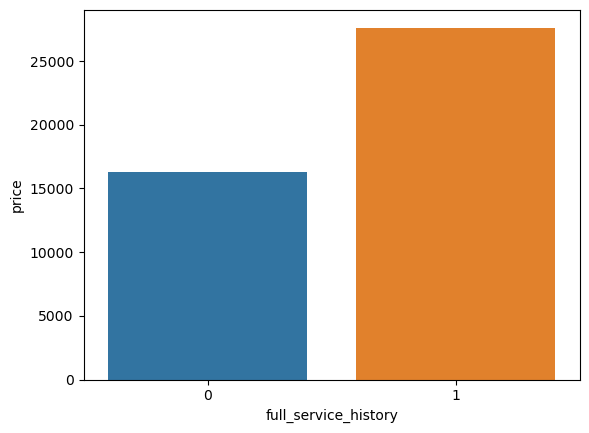

In [619]:
sns.barplot(x=df.groupby("full_service_history")["price"].mean().index,y=df.groupby("full_service_history")["price"].mean())

### emission_class	

In [621]:
df.emission_class.value_counts(dropna=False)

Euro 6          10203
Euro 6d-TEMP     4036
Euro 6d          3468
Euro 5           3055
Euro 4           2193
Euro 3            671
Euro 2            415
Euro 1            369
Euro 6c           142
Name: emission_class, dtype: int64

In [624]:
df.emission_class.replace(['Euro 6d-TEMP','Euro 6d','Euro 6c'],'Euro 6',inplace=True)

In [625]:
df.emission_class.value_counts(dropna=False)

Euro 6    17849
Euro 5     3055
Euro 4     2193
Euro 3      671
Euro 2      415
Euro 1      369
Name: emission_class, dtype: int64

<Axes: xlabel='emission_class', ylabel='price'>

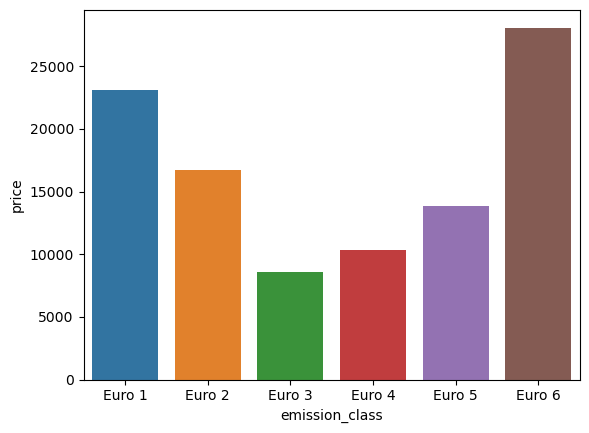

In [626]:
sns.barplot(x=df.groupby("emission_class")["price"].mean().index,y=df.groupby("emission_class")["price"].mean())

### full_service_history

In [628]:
df.full_service_history.value_counts(dropna=False)

1    16564
0     7988
Name: full_service_history, dtype: int64

<Axes: xlabel='full_service_history', ylabel='price'>

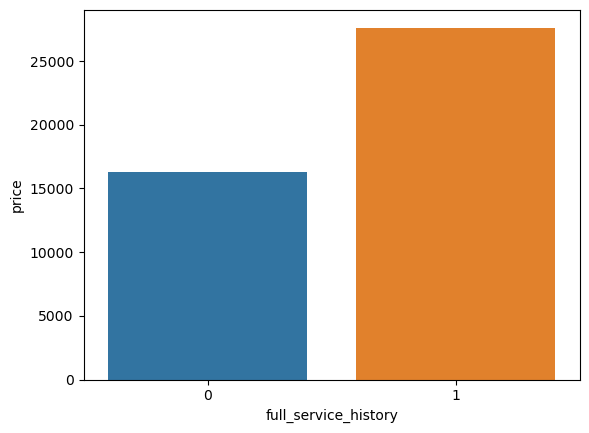

In [629]:
sns.barplot(x=df.groupby("full_service_history")["price"].mean().index,y=df.groupby("full_service_history")["price"].mean())

### upholstery

In [630]:
df.upholstery.value_counts(dropna=False)

Cloth           12164
Full leather     6541
Part leather     3621
alcantara         989
Other             887
Velour            350
Name: upholstery, dtype: int64

<Axes: xlabel='upholstery', ylabel='price'>

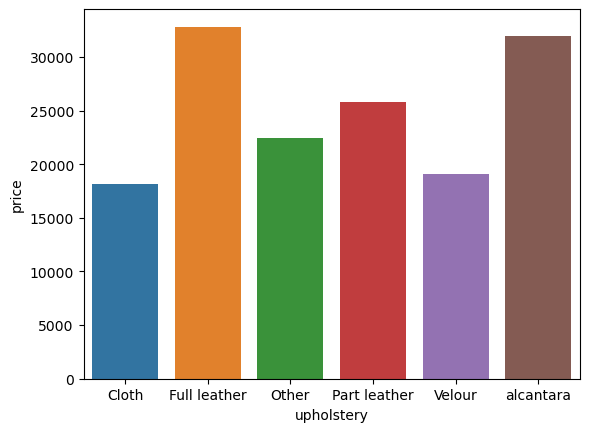

In [631]:
sns.barplot(x=df.groupby("upholstery")["price"].mean().index,y=df.groupby("upholstery")["price"].mean())

In [632]:
df["upholstery"].replace(["Velour", "alcantara", "Part leather", "Full leather"],
                         ["Cloth", "Leather", "Leather", "Leather"], inplace=True)


In [633]:
df["upholstery"].replace("Other", np.nan, inplace=True)

In [634]:
fill_bymode_double(df, 'make', 'body_type', 'upholstery')

In [635]:
df.upholstery.value_counts(dropna=False)

Cloth      13057
Leather    11495
Name: upholstery, dtype: int64

<Axes: xlabel='upholstery', ylabel='price'>

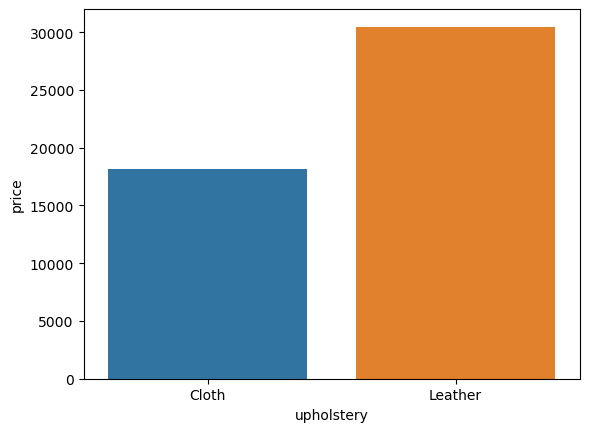

In [636]:
sns.barplot(x=df.groupby("upholstery")["price"].mean().index,y=df.groupby("upholstery")["price"].mean())

### upholstery_colour

In [637]:
df.upholstery_colour.value_counts(dropna=False)

Black     20412
Grey       2147
Other       947
Beige       438
Brown       252
Red         152
White        87
Blue         81
Orange       21
Green         9
Yellow        6
Name: upholstery_colour, dtype: int64

In [638]:
df.drop('upholstery_colour',axis=1,inplace=True)

### previous_owner	

In [639]:
df.previous_owner.value_counts(dropna=False)

1.00     17968
2.00      5407
3.00       824
4.00       190
5.00        65
6.00        35
7.00        31
8.00        16
9.00        10
10.00        2
12.00        2
14.00        1
13.00        1
Name: previous_owner, dtype: int64

<Axes: xlabel='previous_owner', ylabel='price'>

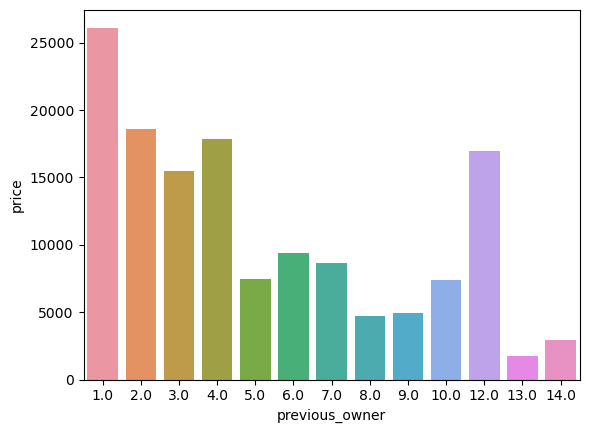

In [640]:
sns.barplot(x=df.groupby("previous_owner")["price"].mean().index,y=df.groupby("previous_owner")["price"].mean())

In [645]:
df[df.previous_owner > 6].shape

(63, 25)

### age

In [646]:
df.age.value_counts(dropna=False)

3.00       3108
0.00       2806
4.00       2753
1.00       2598
2.00       2170
5.00       2004
6.00       1255
7.00        954
8.00        758
9.00        626
10.00       593
11.00       572
12.00       486
15.00       389
13.00       373
14.00       369
16.00       354
17.00       273
18.00       219
19.00       177
20.00       162
21.00       158
22.00       132
23.00       124
24.00        82
28.00        79
25.00        78
27.00        75
26.00        70
30.00        58
31.00        56
29.00        52
32.00        50
56.00        38
55.00        32
34.00        30
57.00        29
49.00        28
54.00        25
35.00        25
50.00        24
36.00        22
44.00        20
33.00        19
37.00        18
51.00        18
52.00        17
39.00        16
53.00        16
43.00        14
47.00        13
46.00        11
45.00        11
40.00        10
38.00        10
59.00         9
58.00         9
48.00         9
41.00         8
60.00         6
61.00         5
67.00         5
42.00   

In [647]:
df.age.describe()

count   24552.00
mean        6.91
std         9.01
min      -180.00
25%         2.00
50%         4.00
75%         9.00
max       122.00
Name: age, dtype: float64

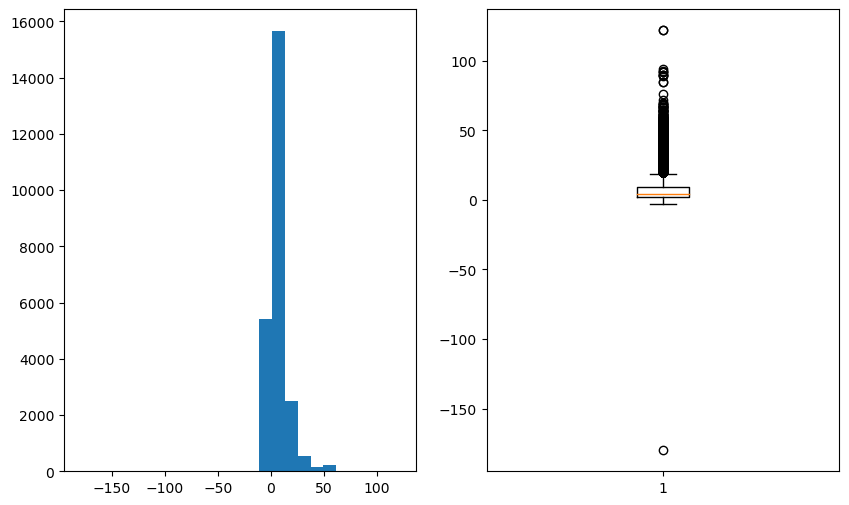

In [659]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.age, bins=25)

plt.subplot(122)
plt.boxplot(df.age, whis=1.5)

plt.show()

In [654]:
df[(df.age<0)|(df.age>60)].shape

(47, 25)

In [655]:
df[(df.age<0)|(df.age>50)].shape

(246, 25)

In [658]:
df[(df.age<0)|(df.age>60)][['age','mileage','price']]

,age,mileage,price
688,65.00,5650.00,199999.00
747,70.00,64000.00,176000.00
762,64.00,35633.00,129000.00
3083,65.00,78000.00,15990.00
3183,72.00,52466.00,17000.00
5080,70.00,66000.00,19000.00
5309,61.00,64200.00,22800.00
6723,-180.00,20926.00,16990.00
7678,92.00,1233.00,8950.00
8706,64.00,84380.00,16500.00


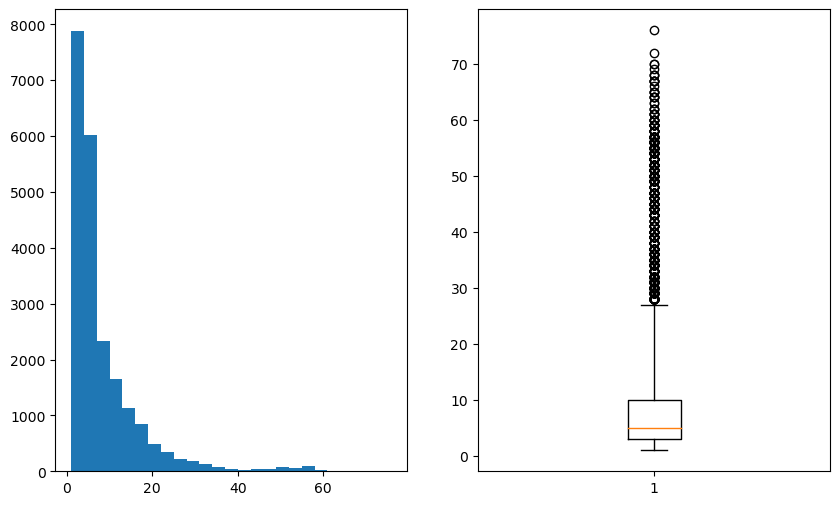

In [662]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df[(df.age>0)&(df.age<80)][["age"]], bins=25)

plt.subplot(122)
plt.boxplot(df[(df.age>0)&(df.age<80)][["age"]], whis=2.5)

plt.show()

In [663]:
age_drop_list = [6723,7678,9336,9568,17458,19412,19502,19539,20101,22547]

In [664]:
df.loc[age_drop_list,'age'] = np.nan

In [668]:
df.age.isna().sum()

10

In [666]:
df.loc[[688]]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,emission_class,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
688,Mercedes-Benz,199999.00,Convertible,Used,5650.00,Manual,benzine,Dealer,2.00,77.00,1991.00,4.00,0.00,Rear,1480.00,0,Euro 6,Leather,3.00,65.00,9.65,Standard,Standard Media,Standard_extras,Safety Standard Package


In [672]:
# fill_bymode_triple(df, 'make', 'body_type', 'mileage', 'age') #takes too much time
fill_bymode_double(df, 'make', 'body_type', 'age') 

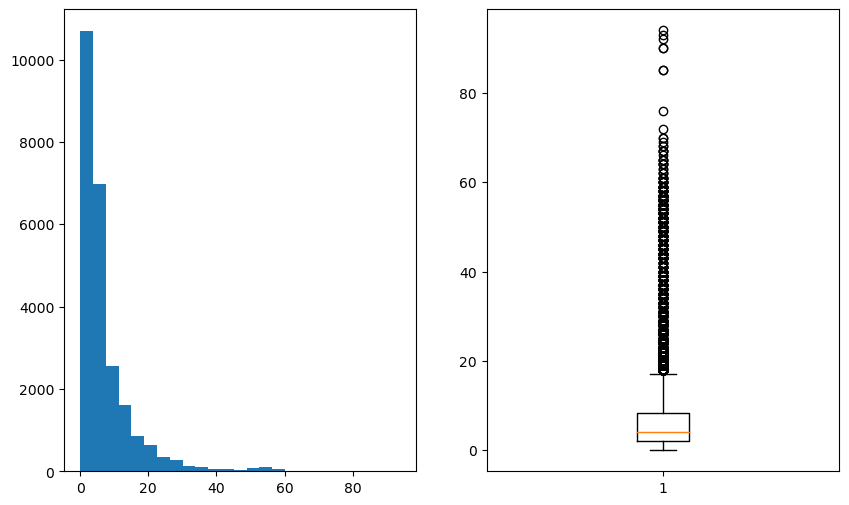

In [673]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.age, bins=25)

plt.subplot(122)
plt.boxplot(df.age, whis=1.5)

plt.show()

### fuel_type	

In [674]:
df.fuel_type.value_counts(dropna=False)

benzine        15957
diesel          7095
gas_benzine      753
gas              432
electric         315
Name: fuel_type, dtype: int64

<Axes: xlabel='fuel_type', ylabel='price'>

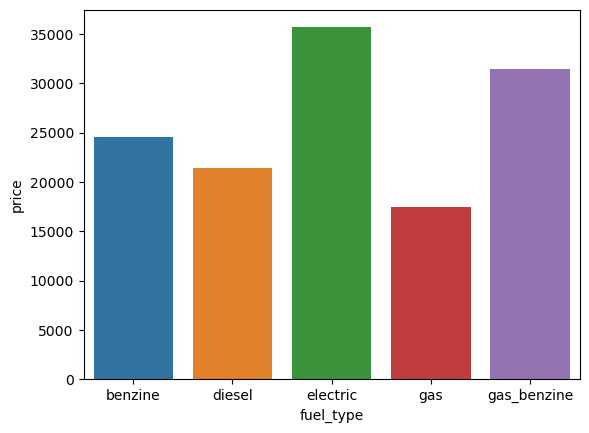

In [675]:
sns.barplot(x=df.groupby("fuel_type")["price"].mean().index,y=df.groupby("fuel_type")["price"].mean())

### price

In [676]:
df.price.describe()

count     24552.00
mean      23924.44
std       26571.18
min         490.00
25%       11900.00
50%       18749.00
75%       28500.00
max     1346900.00
Name: price, dtype: float64

In [681]:
df.price.sort_values().head(25)

5619    490.00
17760   500.00
5288    500.00
16103   590.00
5071    600.00
5127    600.00
5076    699.00
21684   700.00
3200    700.00
5294    740.00
22314   750.00
18288   750.00
5059    750.00
7466    750.00
6217    790.00
5405    790.00
7489    790.00
2437    790.00
2982    799.00
5052    800.00
3280    800.00
7820    800.00
10093   800.00
3796    850.00
11228   850.00
Name: price, dtype: float64

In [677]:
df.price.sort_values().tail(15)

1403     279063.00
687      283900.00
1551     284780.00
1409     299000.00
1046     299000.00
1266     344900.00
19973    349000.00
1278     375900.00
19684    430000.00
19631    549000.00
1175     696900.00
19965    998000.00
24118    999999.00
19855   1075900.00
19867   1346900.00
Name: price, dtype: float64

In [682]:
df[df.price < 1000]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,emission_class,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
2437,Opel,790.00,Compact,Used,198455.00,Manual,benzine,Dealer,5.00,43.00,973.00,5.00,0.00,Front,1015.00,0,Euro 4,Cloth,2.00,21.00,6.75,Standard,Standard Media,Standard_extras,Safety Standard Package
2581,Opel,999.00,Compact,Used,103000.00,Manual,benzine,Dealer,5.00,43.00,973.00,5.00,156.00,Front,1015.00,1,Euro 4,Cloth,1.00,19.00,6.75,Standard,Standard Media,Standard_extras,Safety Standard Package
2982,Opel,799.00,Convertible,Used,151323.00,Manual,benzine,Dealer,5.00,85.00,1798.00,5.00,201.00,Front,1290.00,0,Euro 2,Leather,1.00,26.00,9.30,Standard,Standard Media,Standard_extras,Safety Standard Package
3200,Opel,700.00,Coupe,Used,226000.00,Manual,benzine,Private seller,5.00,85.00,1796.00,5.00,182.00,Front,1270.00,0,Euro 4,Leather,1.00,22.00,8.30,Standard,Standard Media,Premium Plus_extras,Safety Standard Package
3222,Opel,900.00,Coupe,Used,75000.00,Manual,benzine,Dealer,4.00,66.00,1998.00,5.00,161.00,Front,1245.00,0,Euro 4,Cloth,1.00,54.00,6.70,Standard,Standard Media,Premium Plus_extras,Safety Standard Package
3226,Opel,900.00,Coupe,Used,211774.00,Manual,benzine,Private seller,4.00,85.00,1998.00,5.00,161.00,Front,1245.00,0,Euro 3,Cloth,8.00,27.00,8.20,Standard,Standard Media,Standard_extras,Safety Standard Package
3280,Opel,800.00,Coupe,Used,494457.00,Manual,benzine,Private seller,4.00,92.00,1796.00,5.00,184.00,Front,1260.00,0,Euro 4,Cloth,3.00,17.00,8.50,Standard,Premium Media,Standard_extras,Safety Standard Package
3320,Opel,999.00,Coupe,Used,146808.00,Manual,benzine,Dealer,4.00,66.00,1389.00,5.00,174.00,Front,955.00,0,Euro 4,Cloth,1.00,23.00,8.00,Standard,Standard Media,Standard_extras,Safety Standard Package
3796,Opel,850.00,Station wagon,Used,177000.00,Automatic,diesel,Dealer,5.00,92.00,2172.00,8.00,170.00,Front,1666.00,1,Euro 3,Cloth,2.00,18.00,6.75,Standard,Standard Media,Standard_extras,Safety Standard Package
4041,Opel,999.00,Station wagon,Used,166900.00,Manual,benzine,Dealer,5.00,55.00,1598.00,5.00,0.00,Front,1403.00,0,Euro 6,Cloth,1.00,22.00,6.05,Standard,Standard Media,Standard_extras,Safety Standard Package


In [713]:
df[df.price < 1000].shape

(60, 25)

In [693]:
df[df.price > 200000]

,make,price,body_type,type,mileage,gearbox,fuel_type,seller,seats,power,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,emission_class,upholstery,previous_owner,age,fuel_comb_cons,comfort_convenience_Package,entertainment_media_Package,extras_Package,safety_security_Package
418,Mercedes-Benz,239000.00,Convertible,Employee's car,100.00,Automatic,benzine,Dealer,2.00,410.00,3982.00,9.00,259.00,Rear,1735.00,1,Euro 6,Leather,1.00,0.00,10.00,Standard,Standard Media,Premium Plus_extras,Safety Premium Package
430,Mercedes-Benz,221500.00,Convertible,Used,8900.00,Automatic,benzine,Dealer,2.00,430.00,3982.00,7.00,284.00,Rear,1665.00,1,Euro 6,Leather,1.00,2.00,10.00,Standard,Premium Media,Premium Plus_extras,Safety Premium Package
552,Mercedes-Benz,207113.00,Convertible,Demonstration,10000.00,Automatic,benzine,Dealer,4.00,430.00,3982.00,9.00,0.00,4WD,1735.00,1,Euro 6,Leather,1.00,0.00,10.00,Premium Plus,Premium Media,Premium Plus_extras,Safety Premium Package
589,Mercedes-Benz,209000.00,Convertible,Used,172000.00,Automatic,benzine,Dealer,5.00,218.00,4996.00,9.00,0.00,4WD,2350.00,1,Euro 4,Leather,2.00,23.00,10.00,Standard,Standard Media,Standard_extras,Safety Standard Package
600,Mercedes-Benz,209850.00,Convertible,Demonstration,6536.00,Automatic,benzine,Dealer,4.00,430.00,3982.00,9.00,293.00,4WD,1970.00,1,Euro 6,Leather,1.00,0.00,10.00,Premium,Premium Media,Premium Plus_extras,Safety Premium Plus Package
687,Mercedes-Benz,283900.00,Convertible,Used,3569.00,Automatic,benzine,Dealer,2.00,409.00,3982.00,7.00,298.00,Rear,1735.00,1,Euro 6,Leather,1.00,0.00,10.00,Standard,Standard Media,Standard_extras,Safety Standard Package
764,Mercedes-Benz,217900.00,Convertible,Used,10.00,Automatic,benzine,Private seller,4.00,430.00,3982.00,9.00,0.00,4WD,1970.00,1,Euro 6,Leather,1.00,0.00,11.25,Premium,Premium Media,Premium Plus_extras,Safety Premium Plus Package
797,Mercedes-Benz,219000.00,Coupe,Used,3800.00,Automatic,benzine,Dealer,2.00,430.00,3982.00,9.00,299.00,4WD,1820.00,1,Euro 6,Leather,1.00,1.00,11.85,Premium,Premium Media,Premium Plus_extras,Safety Premium Package
812,Mercedes-Benz,209900.00,Coupe,Used,13250.00,Automatic,benzine,Dealer,2.00,430.00,3982.00,9.00,284.00,4WD,1820.00,1,Euro 6,Leather,1.00,2.00,11.85,Premium,Premium Media,Premium Plus_extras,Safety Premium Package
834,Mercedes-Benz,214885.00,Coupe,Demonstration,6900.00,Automatic,benzine,Dealer,4.00,470.00,3982.00,9.00,180.00,4WD,2380.00,1,Euro 6,Leather,1.00,0.00,11.85,Standard,Premium Media,Premium Plus_extras,Safety Premium Package


In [716]:
df[df.price > 150000].shape
# df[df.price > 200000][['price',"mileage",'age']]

(126, 25)

In [692]:
df[df.price > 250000].shape

(21, 25)

In [719]:
df[df.price > 200000].index

Int64Index([  418,   430,   552,   589,   600,   687,   764,   797,   812,
              834,   885,   936,  1046,  1083,  1175,  1266,  1278,  1281,
             1354,  1358,  1374,  1403,  1409,  1447,  1459,  1529,  1543,
             1551,  9816, 17559, 17701, 17783, 17794, 19391, 19631, 19684,
            19855, 19867, 19965, 19969, 19973, 20007, 24118],
           dtype='int64')

In [695]:
price_drop_list = [430,   552,   589,   687,   812,
                1083,  1175,  1281,
             1354,  1358,  1374,  1403,  1409,  1447,  1459,  1529,  1543,
             1551,  9816, 17559, 17701, 17783, 17794, 19391, 19631, 19684,
            19855, 19867, 19965, 19969, 19973, 20007, 24118]

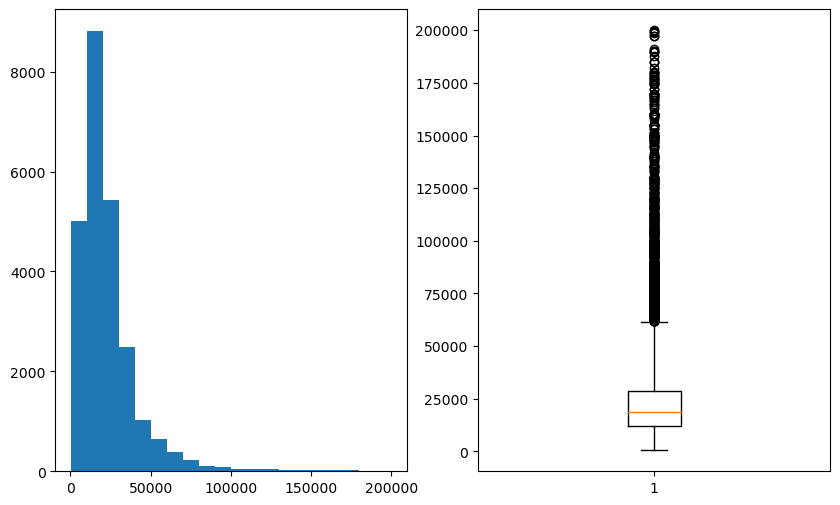

In [721]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df[(df.price < 200000) & (df.price >0)]['price'], bins=20)

plt.subplot(122)
plt.boxplot(df[(df.price < 200000) & (df.price >0)]['price'], whis=2)

plt.show()

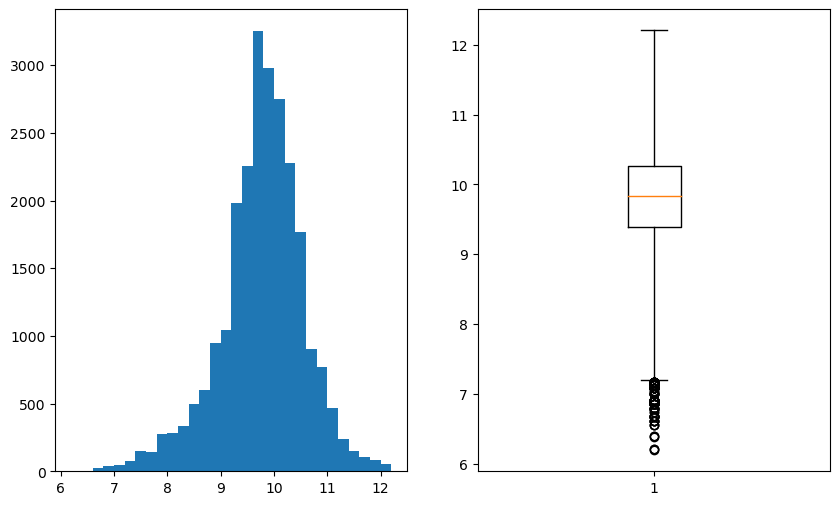

In [722]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(df[(df.price < 200000) & (df.price >0)]['price']), bins=30)

plt.subplot(122)
plt.boxplot(np.log(df[(df.price < 200000) & (df.price >0)]['price']), whis=2.5)

plt.show()

In [723]:
df.drop(index = df[df.price > 200000].index, axis = 0, inplace = True)

In [724]:
df.shape

(24509, 25)

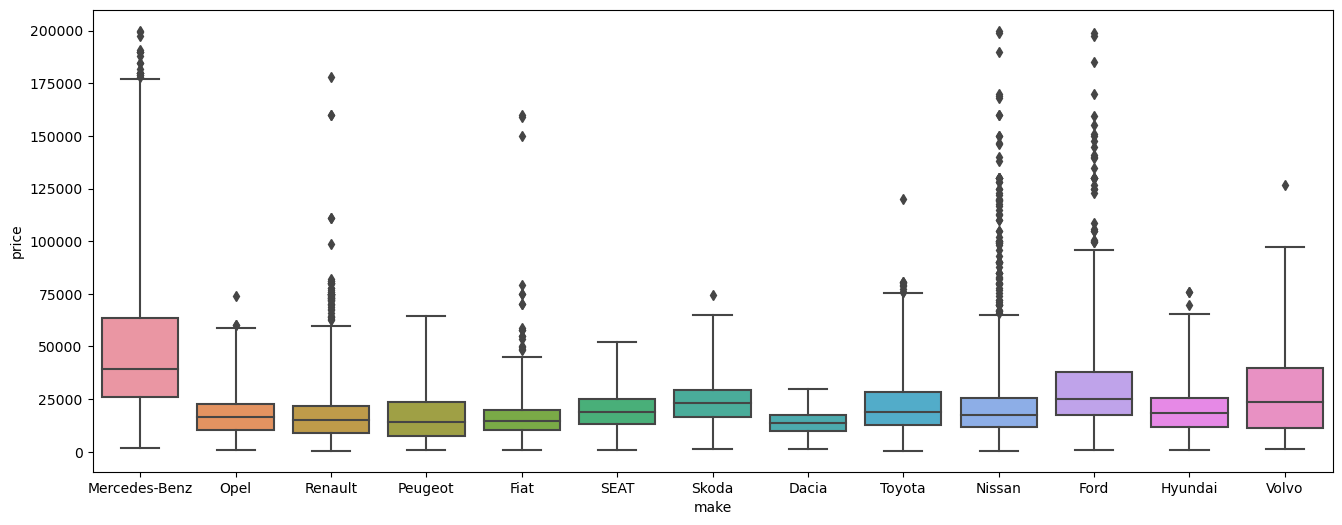

In [726]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make", y="price", data=df, whis=3)
plt.show()

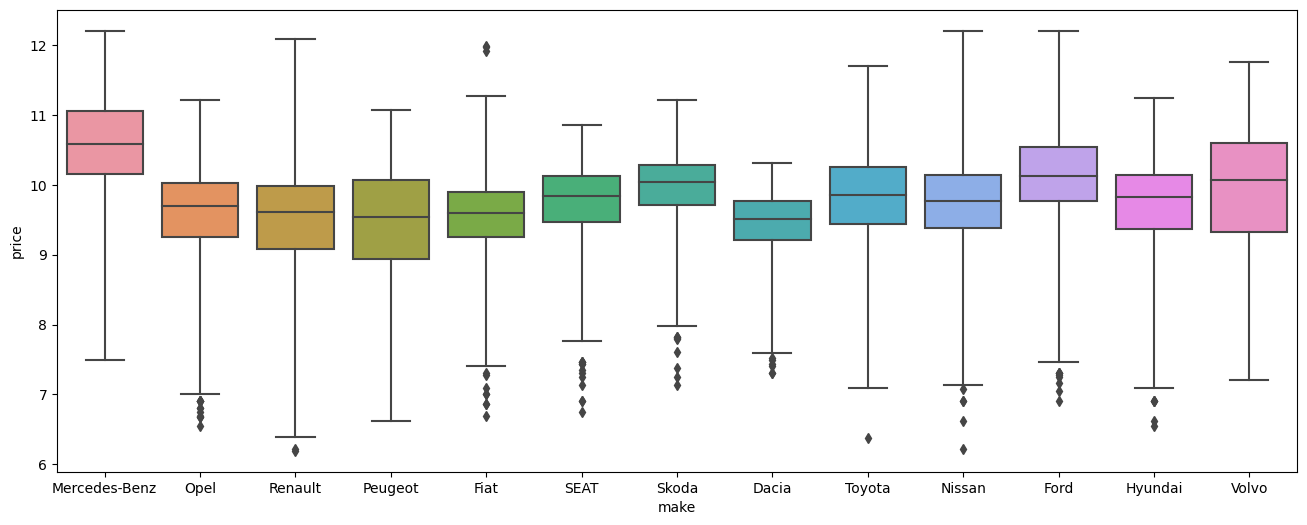

In [727]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make", y=np.log(df.price), data=df, whis=3)
plt.show()

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24509 entries, 0 to 24551
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         24509 non-null  object 
 1   price                        24509 non-null  float64
 2   body_type                    24509 non-null  object 
 3   type                         24509 non-null  object 
 4   mileage                      24509 non-null  float64
 5   gearbox                      24509 non-null  object 
 6   fuel_type                    24509 non-null  object 
 7   seller                       24509 non-null  object 
 8   seats                        24509 non-null  float64
 9   power                        24509 non-null  float64
 10  engine_size                  24509 non-null  float64
 11  gears                        24509 non-null  float64
 12  co_emissions                 24509 non-null  float64
 13  drivetrain      

In [738]:
df.reset_index(drop=True, inplace=True)

In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24509 entries, 0 to 24508
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         24509 non-null  object 
 1   price                        24509 non-null  float64
 2   body_type                    24509 non-null  object 
 3   type                         24509 non-null  object 
 4   mileage                      24509 non-null  float64
 5   gearbox                      24509 non-null  object 
 6   fuel_type                    24509 non-null  object 
 7   seller                       24509 non-null  object 
 8   seats                        24509 non-null  float64
 9   power                        24509 non-null  float64
 10  engine_size                  24509 non-null  float64
 11  gears                        24509 non-null  float64
 12  co_emissions                 24509 non-null  float64
 13  drivetrain      

# Final Step (Checking final situation of data via graphs)

In [740]:
df.head(4).T

,0,1,2,3
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
price,16950.00,80900.00,69900.00,46990.00
body_type,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used
mileage,120200.00,5000.00,18900.00,18995.00
gearbox,Manual,Automatic,Automatic,Automatic
fuel_type,diesel,electric,benzine,benzine
seller,Dealer,Dealer,Dealer,Dealer
seats,5.00,5.00,5.00,5.00
power,100.00,215.00,310.00,225.00


In [741]:
num_columns = ['price','mileage','power','engine_size','gears','seats','co_emissions','empty_weight','age','fuel_comb_cons']

In [742]:
df_numerical = df[num_columns]

In [744]:
df_numerical.head(3).T

,0,1,2
price,16950.00,80900.00,69900.00
mileage,120200.00,5000.00,18900.00
power,100.00,215.00,310.00
engine_size,1991.00,1991.00,1991.00
gears,6.00,9.00,8.00
seats,5.00,5.00,5.00
co_emissions,104.00,0.00,126.00
empty_weight,1555.00,1555.00,1555.00
age,6.00,0.00,2.00
fuel_comb_cons,4.65,4.65,8.35


<Axes: >

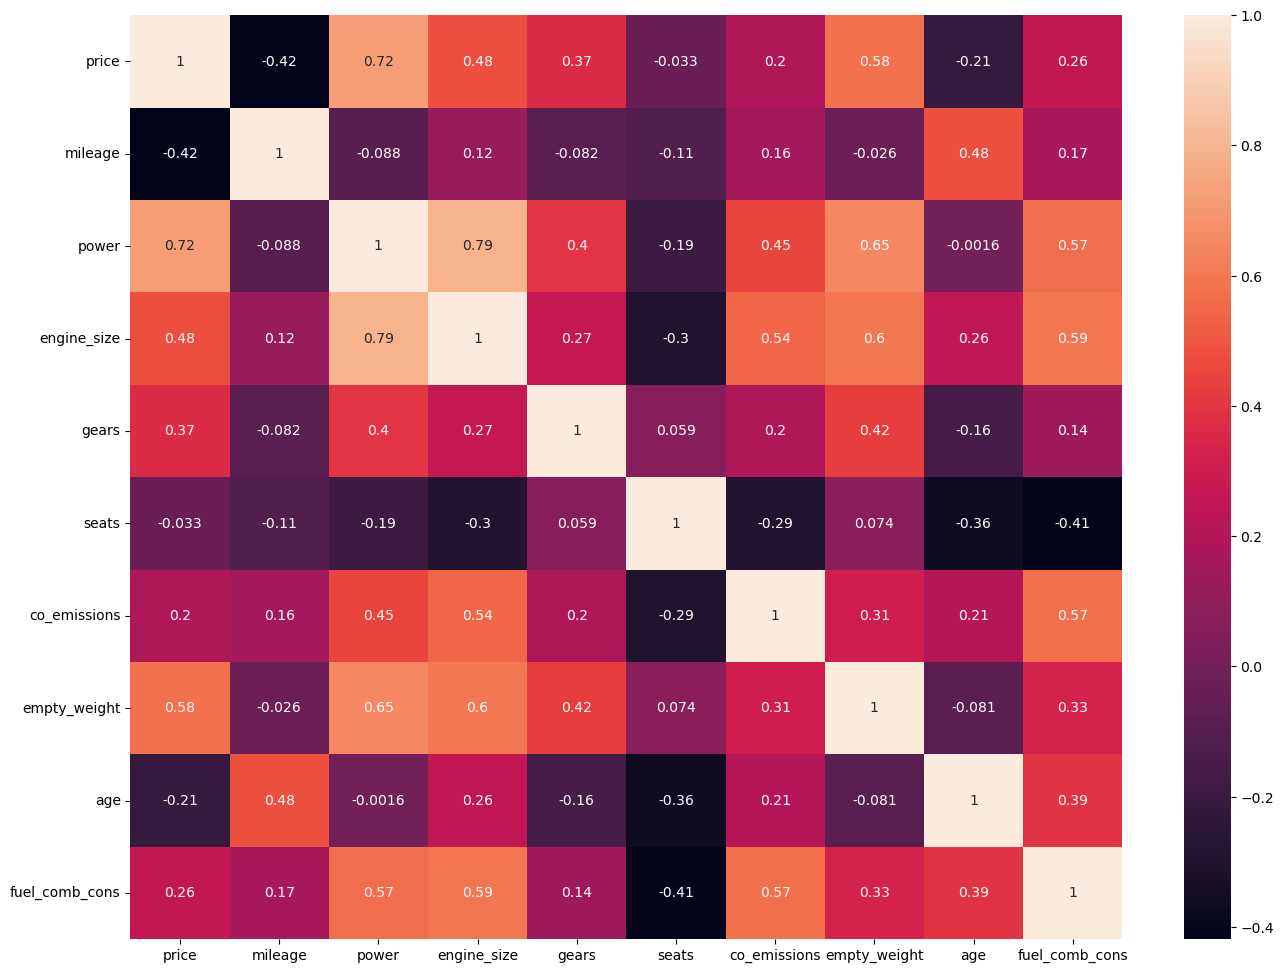

In [745]:
plt.figure(figsize = (16,12))
sns.heatmap(df_numerical.corr(), annot = True)

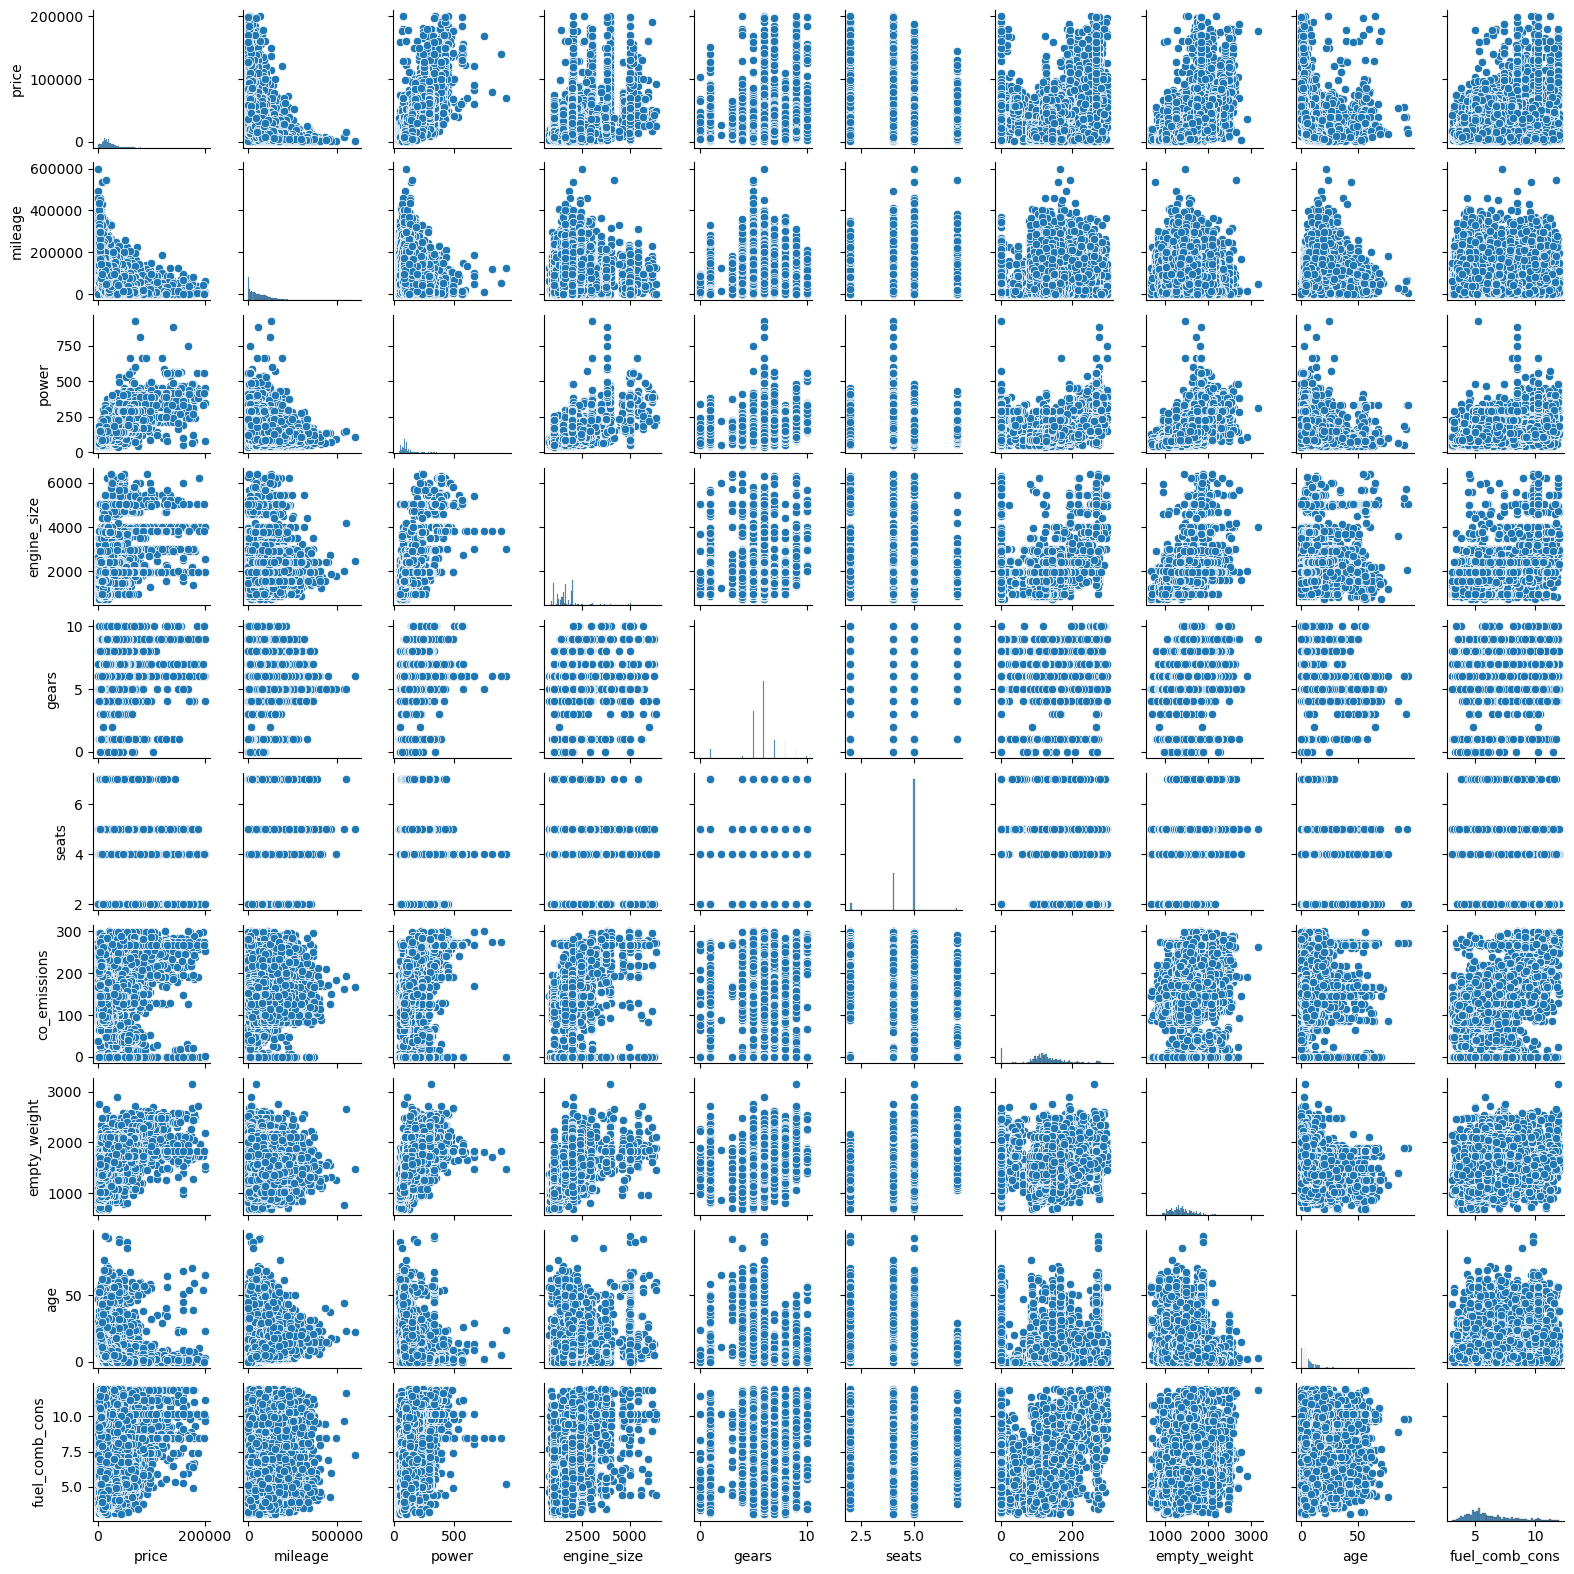

In [750]:
sns.pairplot(df_numerical, size = 1.6)
plt.show()

# Dummy Operation

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24509 entries, 0 to 24508
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         24509 non-null  object 
 1   price                        24509 non-null  float64
 2   body_type                    24509 non-null  object 
 3   type                         24509 non-null  object 
 4   mileage                      24509 non-null  float64
 5   gearbox                      24509 non-null  object 
 6   fuel_type                    24509 non-null  object 
 7   seller                       24509 non-null  object 
 8   seats                        24509 non-null  float64
 9   power                        24509 non-null  float64
 10  engine_size                  24509 non-null  float64
 11  gears                        24509 non-null  float64
 12  co_emissions                 24509 non-null  float64
 13  drivetrain      

In [752]:
df.shape

(24509, 25)

In [753]:
df_final = pd.get_dummies(df)

In [754]:
df_final.shape

(24509, 67)

In [755]:
df_final.head(4).T

,0,1,2,3
price,16950.00,80900.00,69900.00,46990.00
mileage,120200.00,5000.00,18900.00,18995.00
seats,5.00,5.00,5.00,5.00
power,100.00,215.00,310.00,225.00
engine_size,1991.00,1991.00,1991.00,1991.00
gears,6.00,9.00,8.00,7.00
co_emissions,104.00,0.00,126.00,126.00
empty_weight,1555.00,1555.00,1555.00,1555.00
full_service_history,0.00,1.00,1.00,1.00
previous_owner,2.00,1.00,1.00,1.00


## Export dataframe to csv file (dummy)

In [756]:
df_final.to_csv("final_scout_dummy.csv", index=False)

End of the project